In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sweetviz as sw

import warnings
warnings.filterwarnings('ignore')
# import pandas_profiling as pf

from category_encoders import CatBoostEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_fscore_support, precision_recall_curve, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
data = pd.read_csv('three_prep_classes.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
data.head(10)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.545403e+09,CAIu3p4lHKaPiLbVpl,192.168.1.197,38370,197.27.142.134,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
1,1.545380e+09,CCmp5o2RqdDClaLJaf,192.168.1.197,38370,41.246.157.119,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
2,1.545373e+09,CO7mtKwG5OcTJDbSc,192.168.1.197,38370,197.216.18.19,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
3,1.545366e+09,CXmPfQ1IkUlge2WlVf,192.168.1.197,38370,197.47.34.43,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
4,1.545414e+09,CmBEGY3BlTxpPfSQga,192.168.1.197,38370,197.154.207.62,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
5,1.545363e+09,CXyeKc1I5t8L4Xdbjj,192.168.1.197,38370,156.131.216.2,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
6,1.545361e+09,CeFoRdzmwdKzAa3x6,192.168.1.197,38370,197.249.22.162,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
7,1.545383e+09,Cl5UI74zEiSRZMEjUe,192.168.1.197,38370,197.39.98.53,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
8,1.545364e+09,CN1C5j1Jl7qV06L4V1,192.168.1.197,38370,41.69.211.218,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
9,1.545339e+09,Ccz2Os19XTHJ0x8j81,192.168.1.197,38370,41.68.31.16,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru


In [4]:
data.columns 

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')

In [6]:
data.columns = ['ts', 'uid', 'id_orig_h', 'id_orig_p', 'id_resp_h', 'id_resp_p','proto', 'service', 'duration', 'orig_bytes', 'resp_bytes','conn_state', 'local_orig', 'local_resp', 
 'missed_bytes', 'history','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','tunnel_parents', 'label', 'multi_label']

In [7]:
data.head(3)

,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,multi_label
0,1.545403e+09,CAIu3p4lHKaPiLbVpl,192.168.1.197,38370,197.27.142.134,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
1,1.545380e+09,CCmp5o2RqdDClaLJaf,192.168.1.197,38370,41.246.157.119,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru
2,1.545373e+09,CO7mtKwG5OcTJDbSc,192.168.1.197,38370,197.216.18.19,37215,tcp,-,-,-,...,-,0,S,1,40,0,0,-,Malicious,Okiru


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190000 entries, 0 to 189999
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ts              190000 non-null  float64
 1   uid             190000 non-null  object 
 2   id_orig_h       190000 non-null  object 
 3   id_orig_p       190000 non-null  int64  
 4   id_resp_h       190000 non-null  object 
 5   id_resp_p       190000 non-null  int64  
 6   proto           190000 non-null  object 
 7   service         190000 non-null  object 
 8   duration        190000 non-null  object 
 9   orig_bytes      190000 non-null  object 
 10  resp_bytes      190000 non-null  object 
 11  conn_state      190000 non-null  object 
 12  local_orig      190000 non-null  object 
 13  local_resp      190000 non-null  object 
 14  missed_bytes    190000 non-null  int64  
 15  history         190000 non-null  object 
 16  orig_pkts       190000 non-null  int64  
 17  orig_ip_by

In [10]:
data['duration'] = data['duration'].astype(str).str.replace('-','0')
data['orig_bytes'] = data['orig_bytes'].astype(str).str.replace('-','0')
data['resp_bytes'] = data['resp_bytes'].astype(str).str.replace('-','0')
data['multi_label'] = data['multi_label'].astype(str).str.replace('C&C-HeartBeat','c_c_heartbeat')
data['multi_label'] = data['multi_label'].astype(str).str.replace('-','normal')

data['duration'] = data['duration'].astype(float)
data['orig_bytes'] = data['orig_bytes'].astype(float)
data['resp_bytes'] = data['resp_bytes'].astype(float)

In [102]:
sw_rep = sw.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)


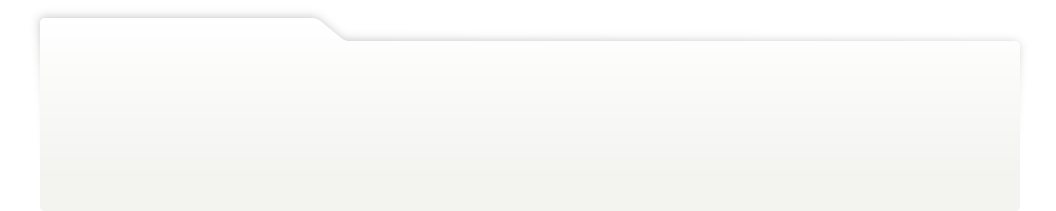
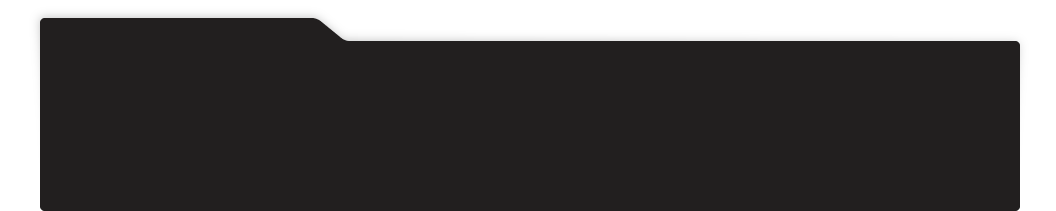
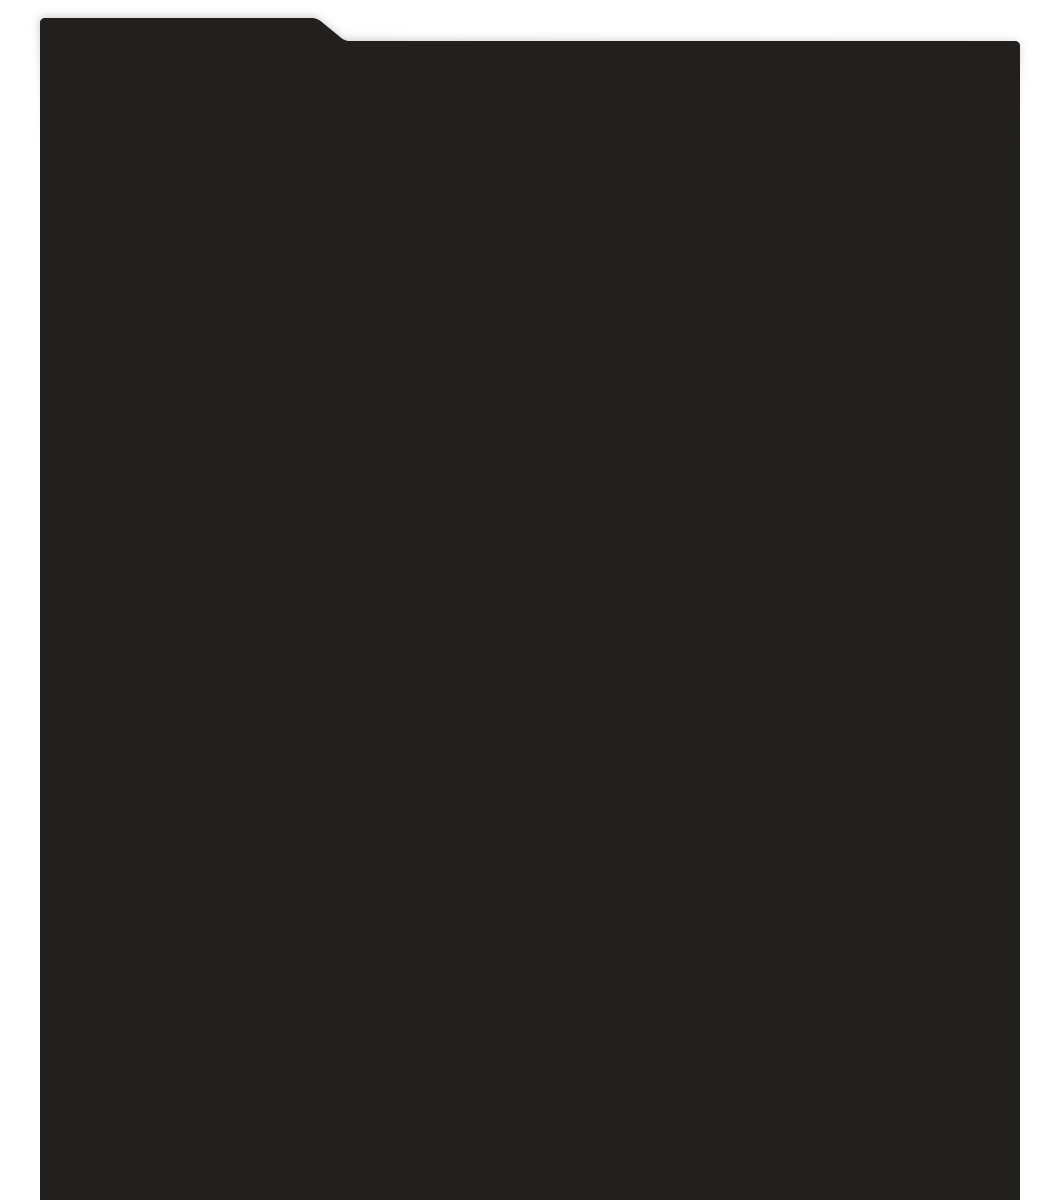
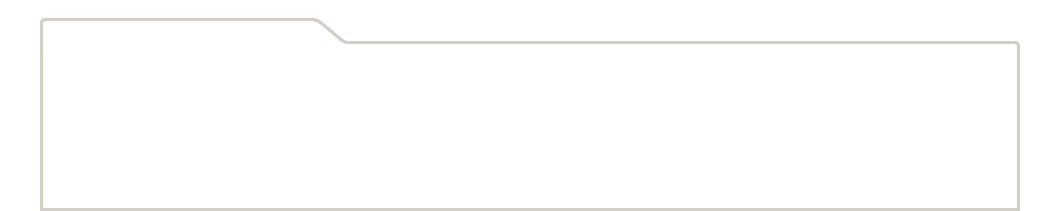
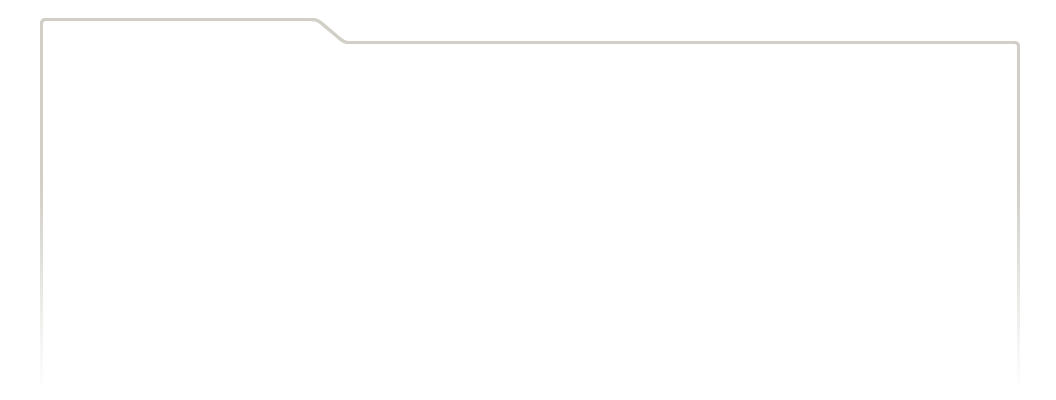
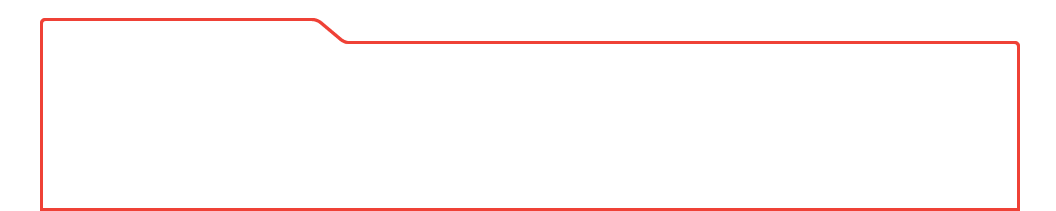
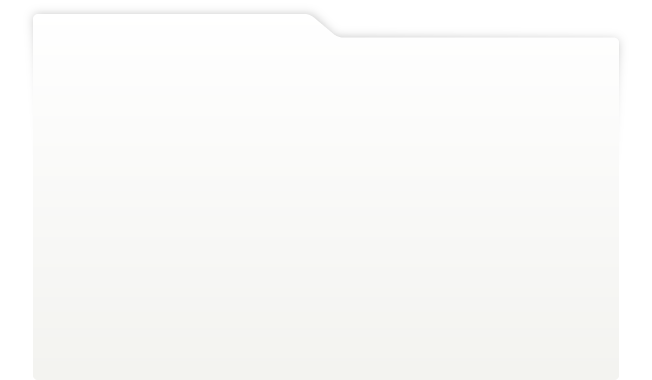
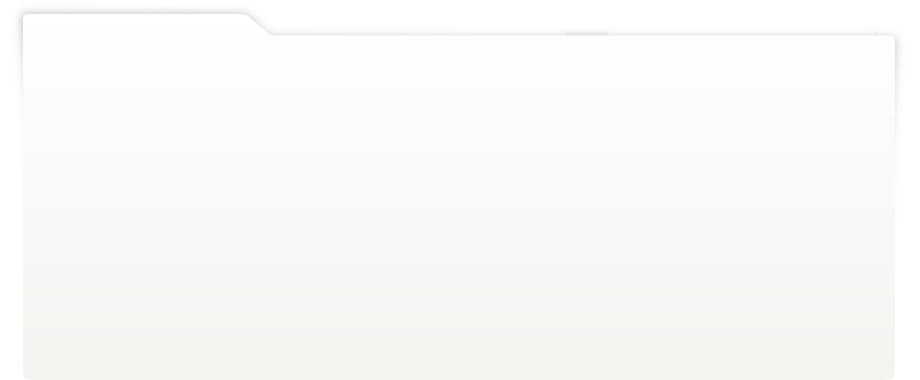
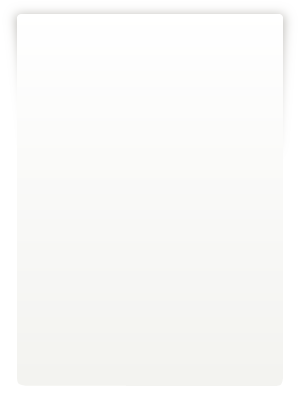
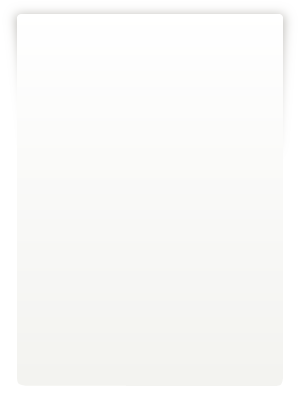
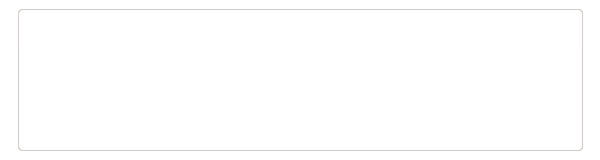
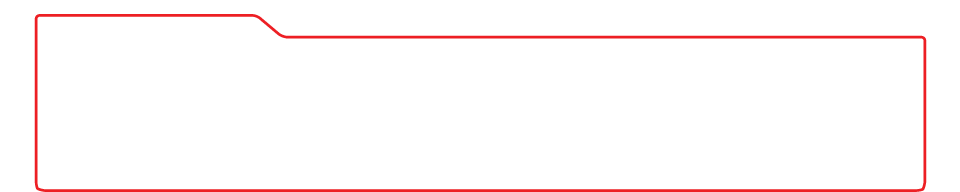
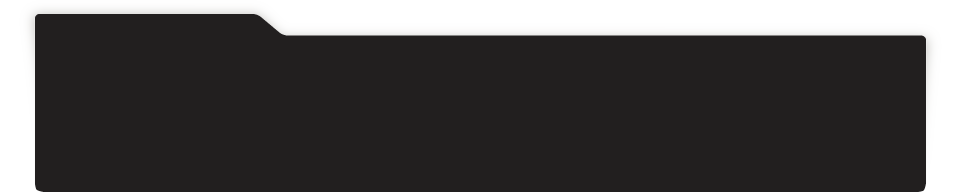
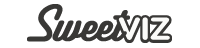
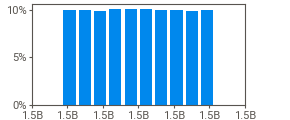
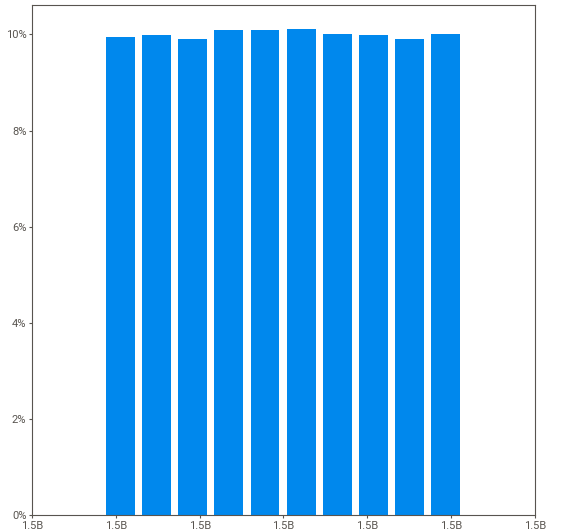
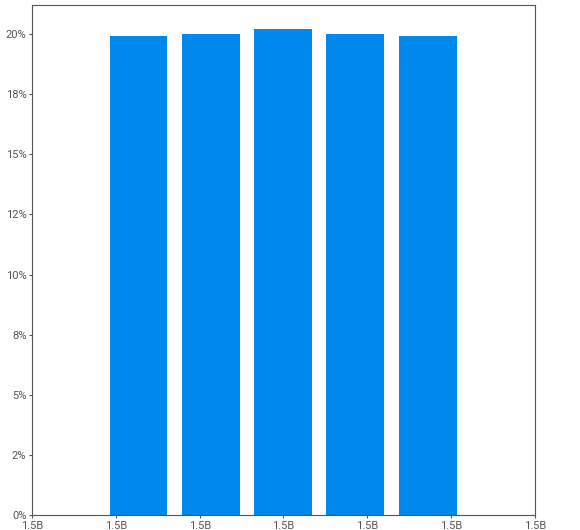
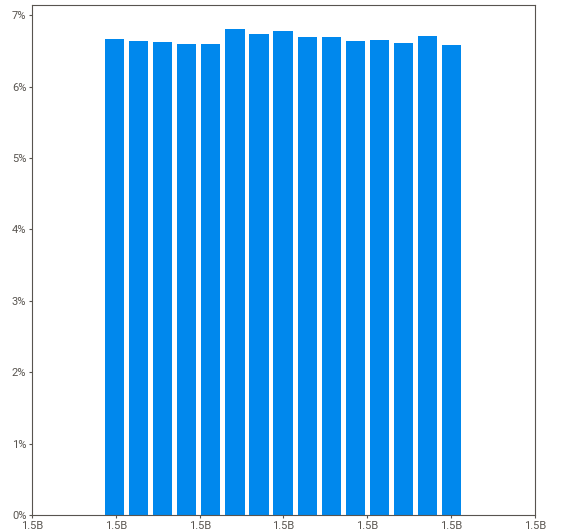
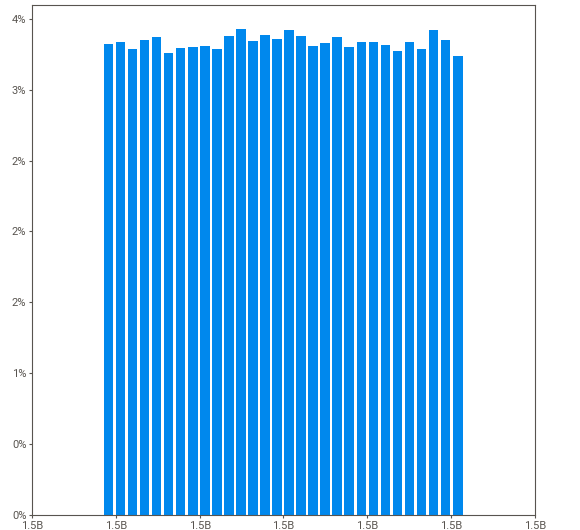
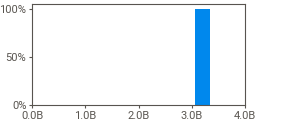
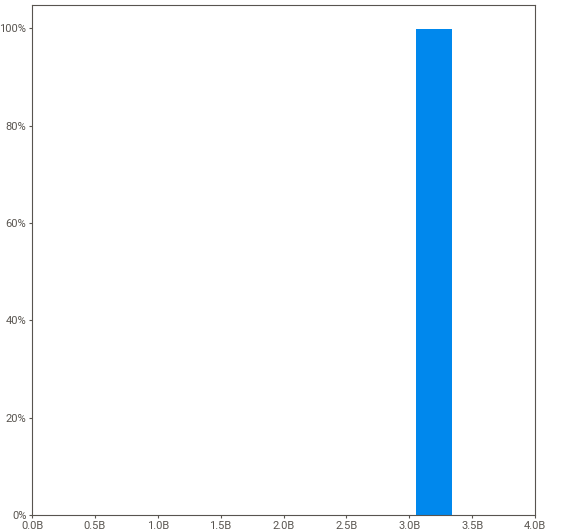
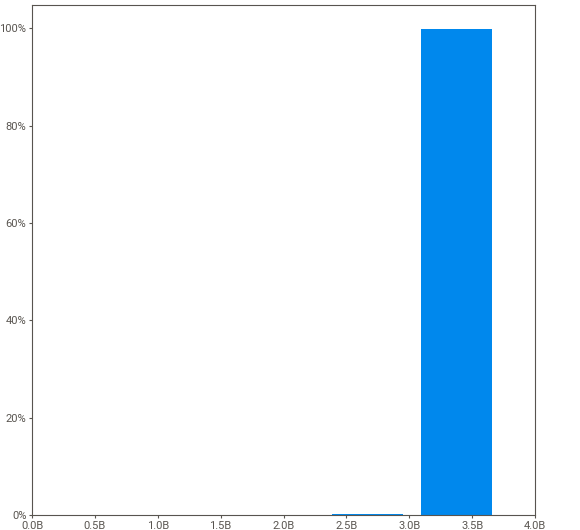
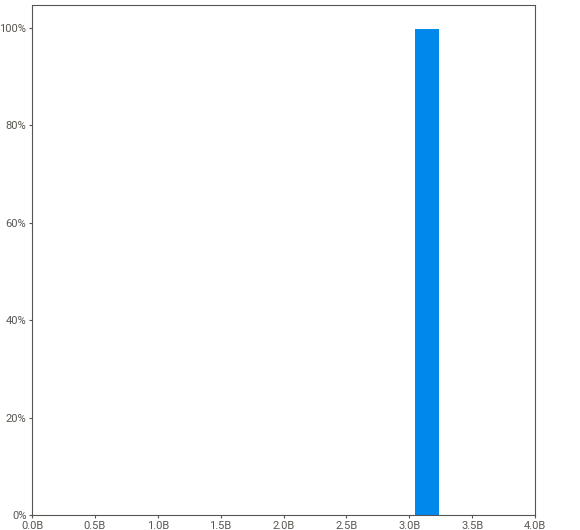
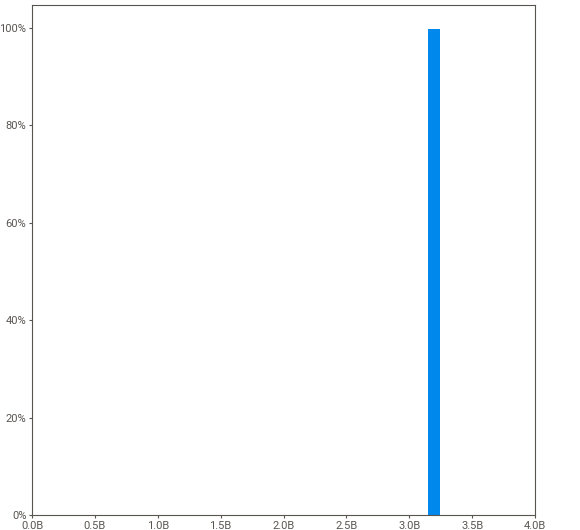
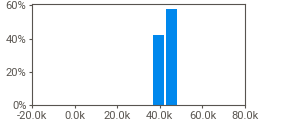
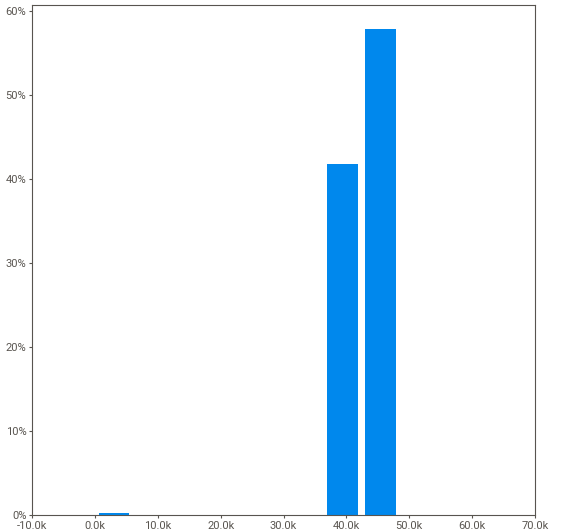
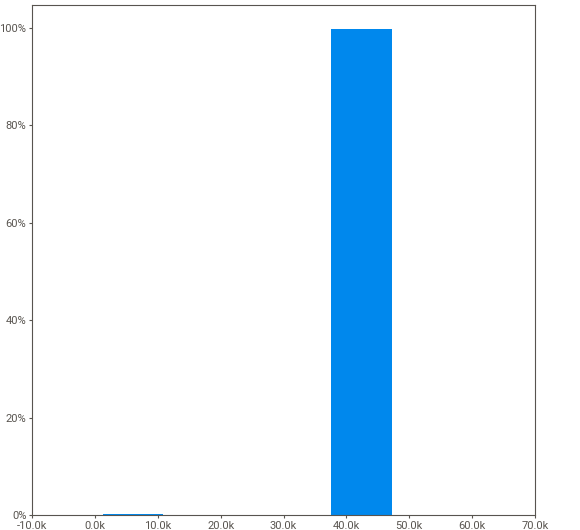
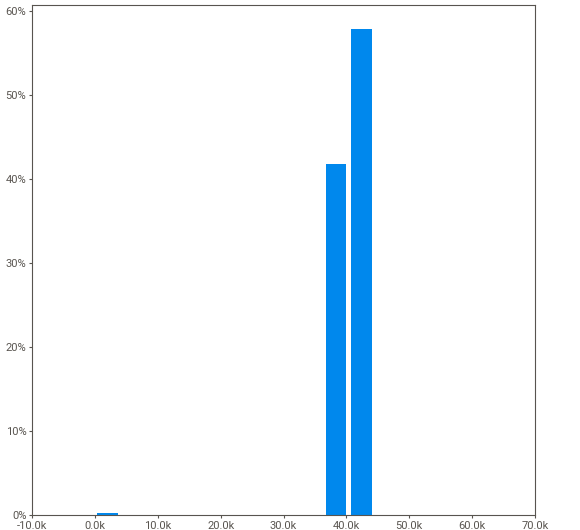
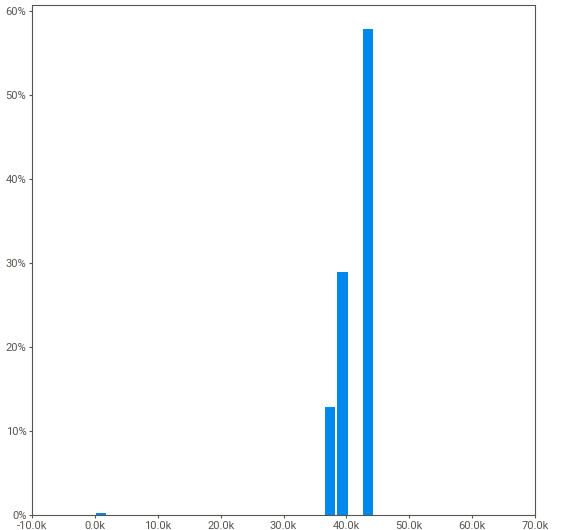
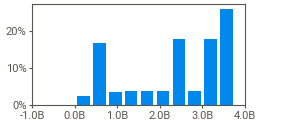
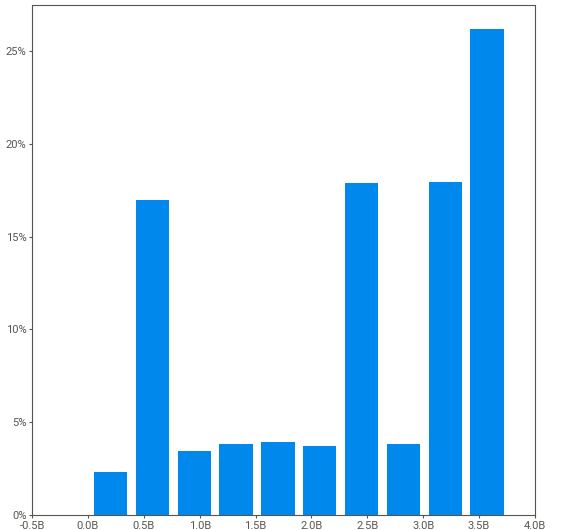
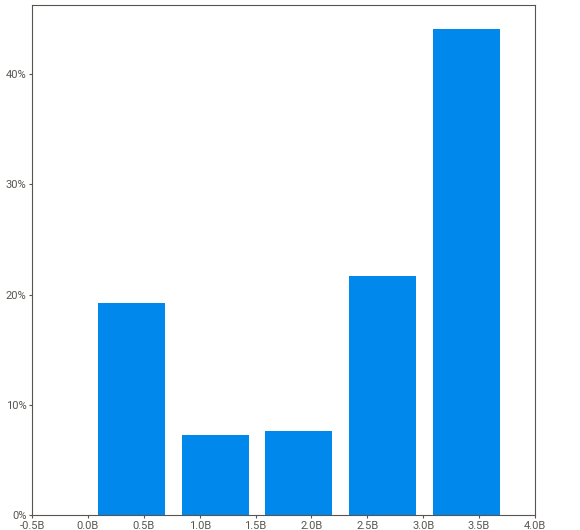
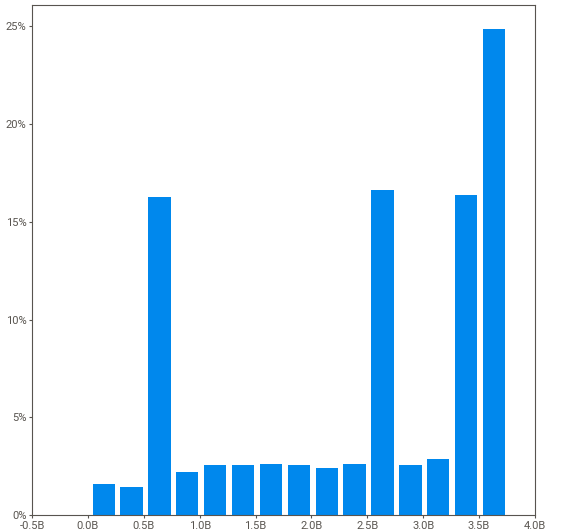
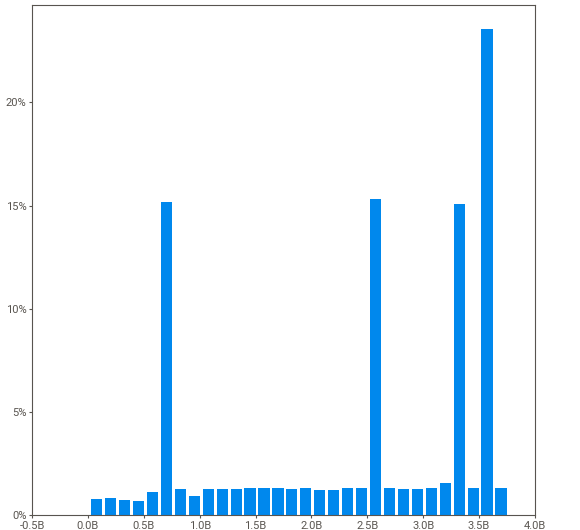
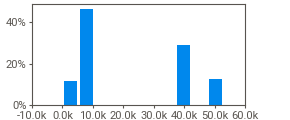
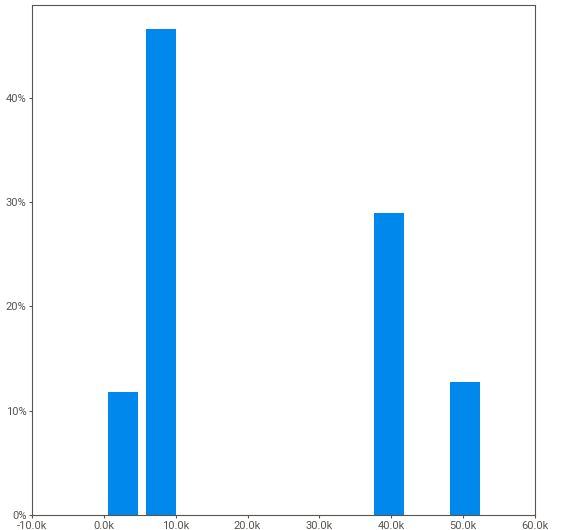
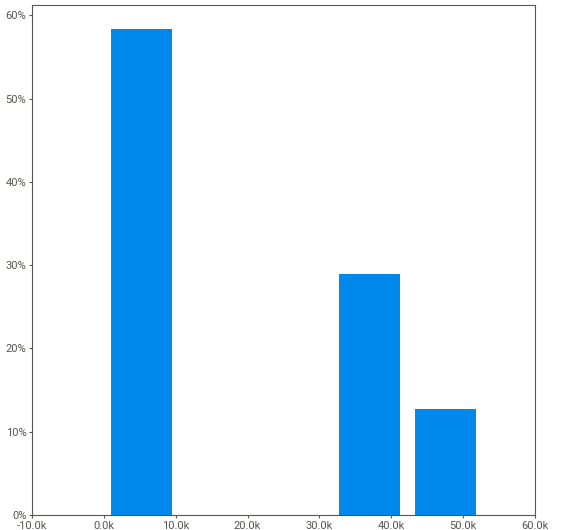
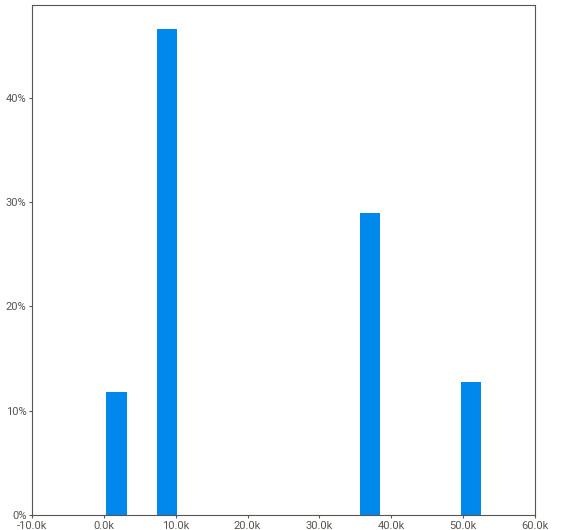
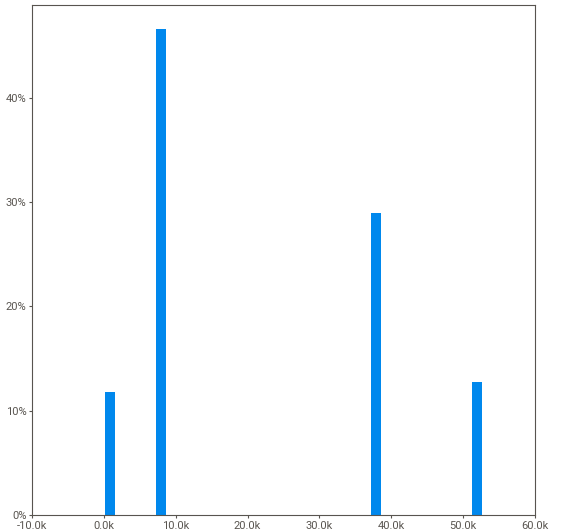
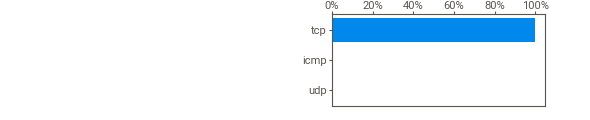
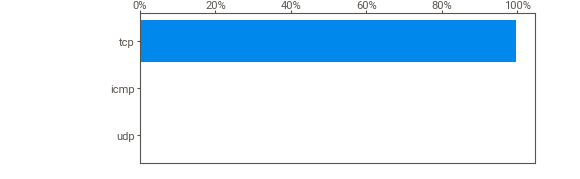
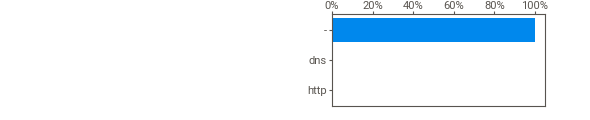
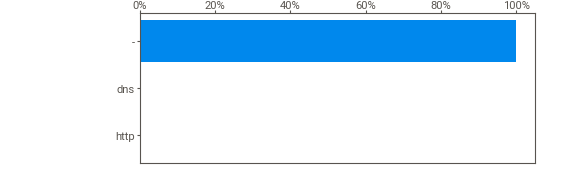
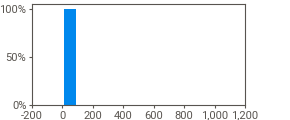
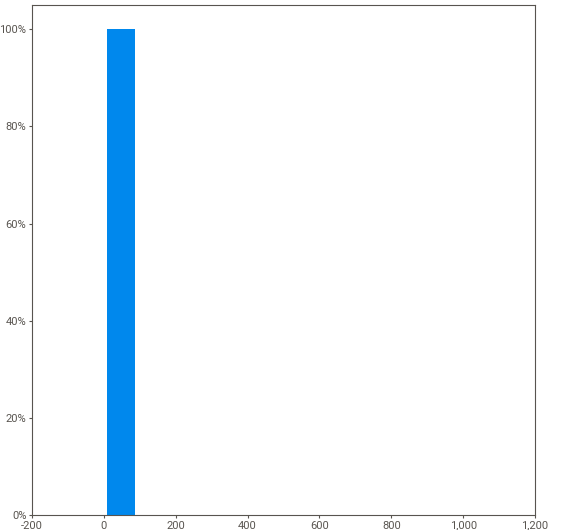
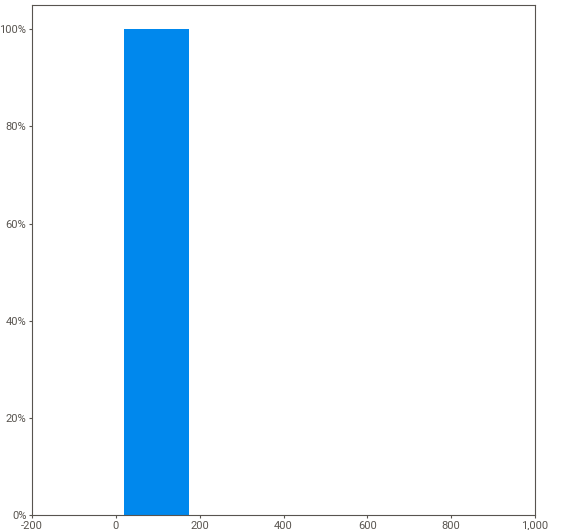
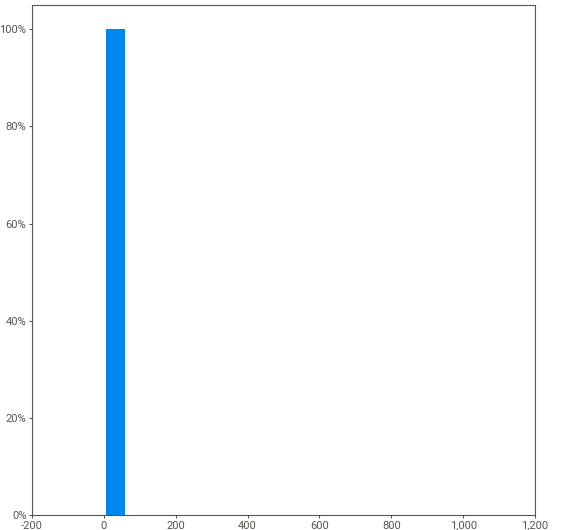
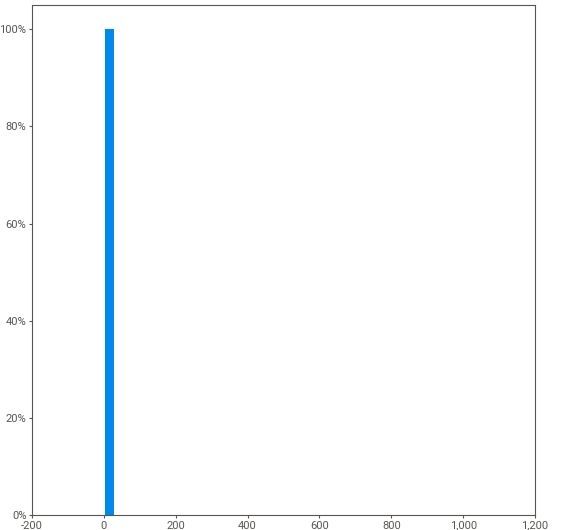
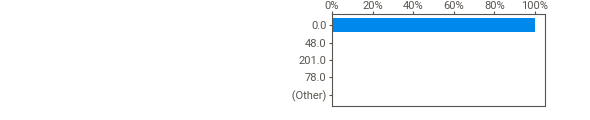
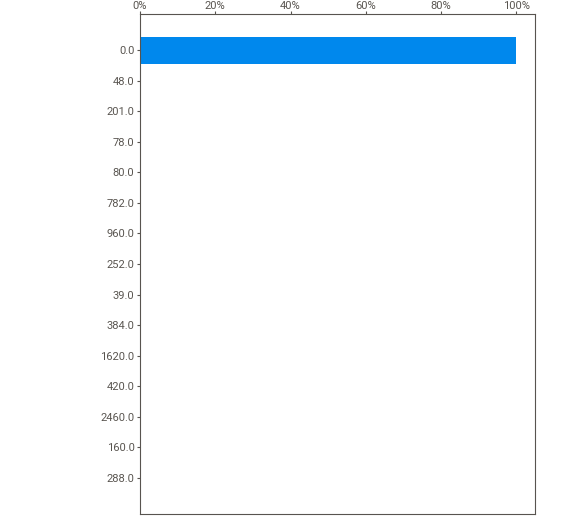
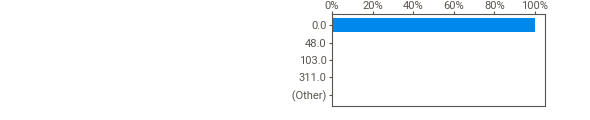
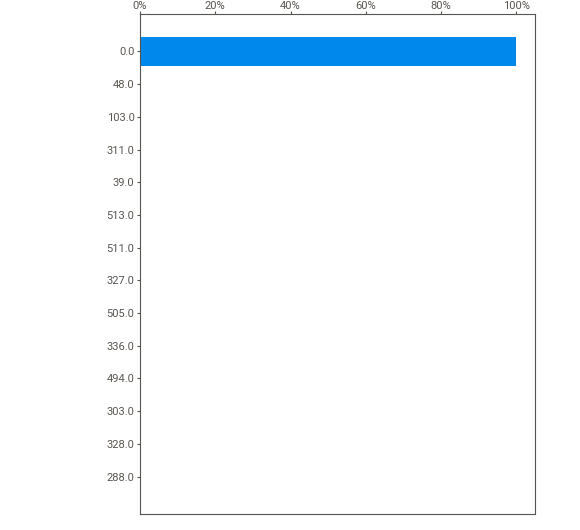
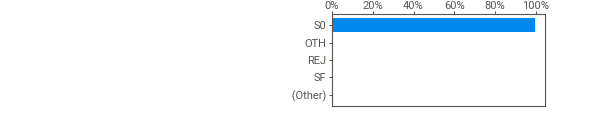
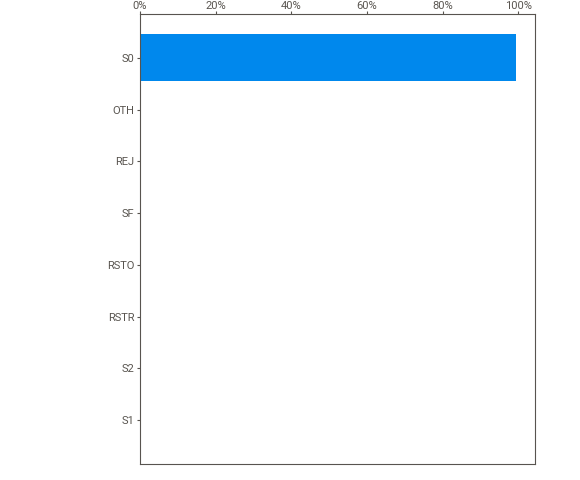
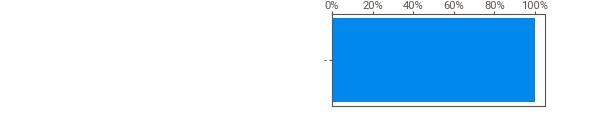
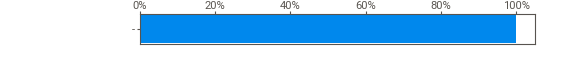
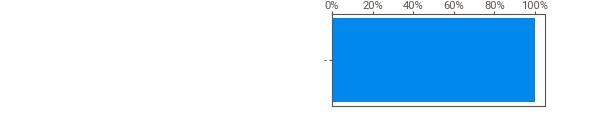
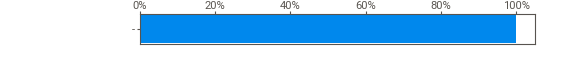
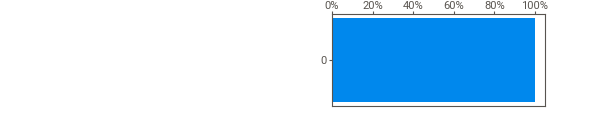
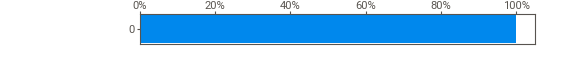
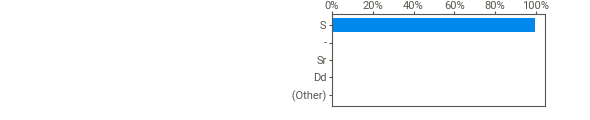
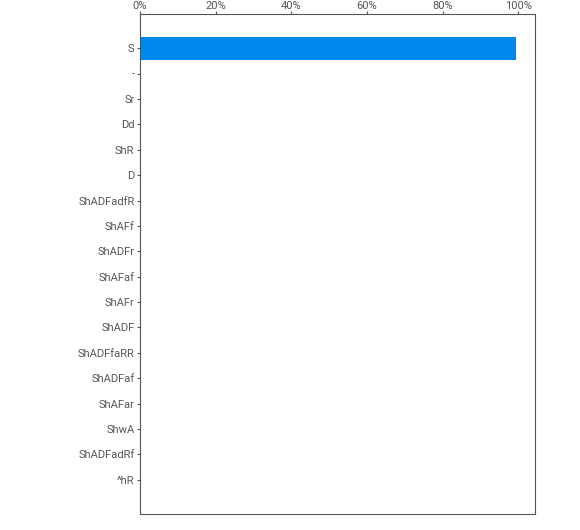
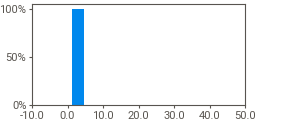
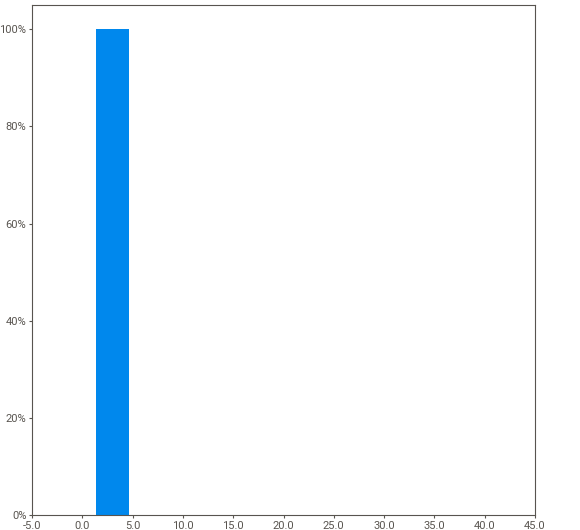
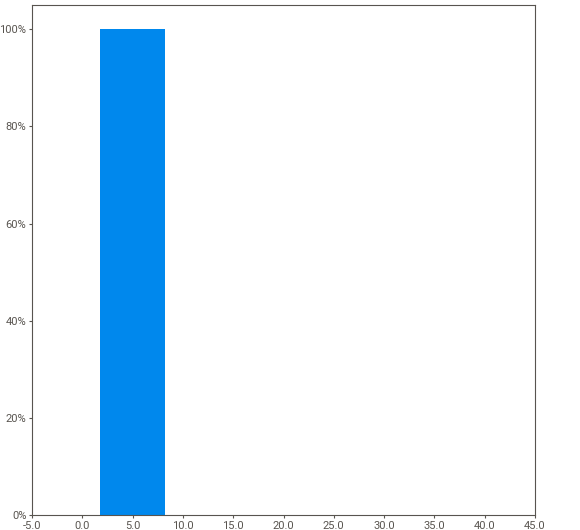
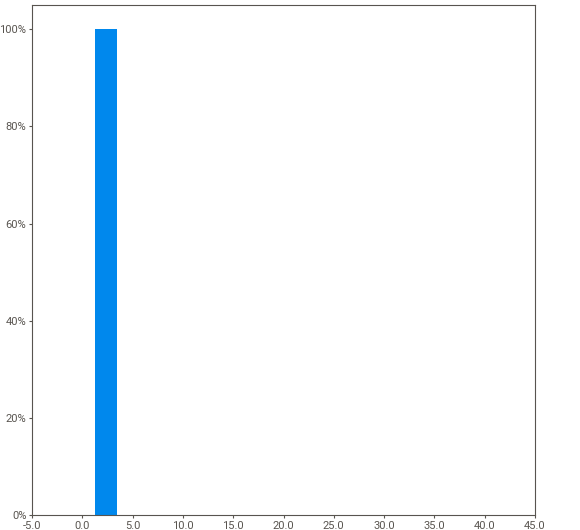
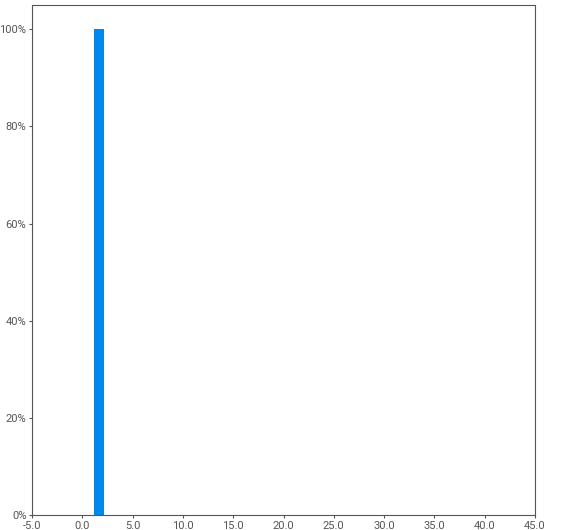
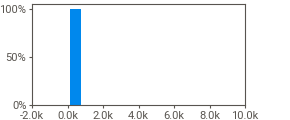
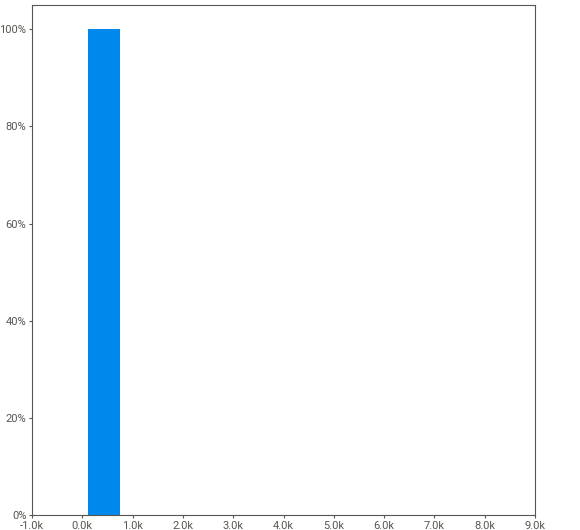
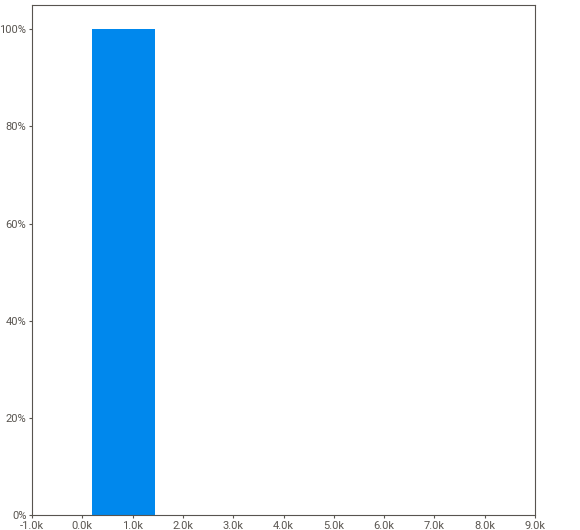
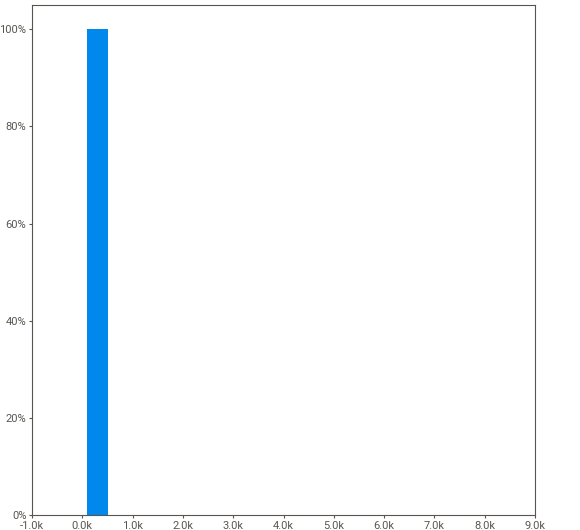
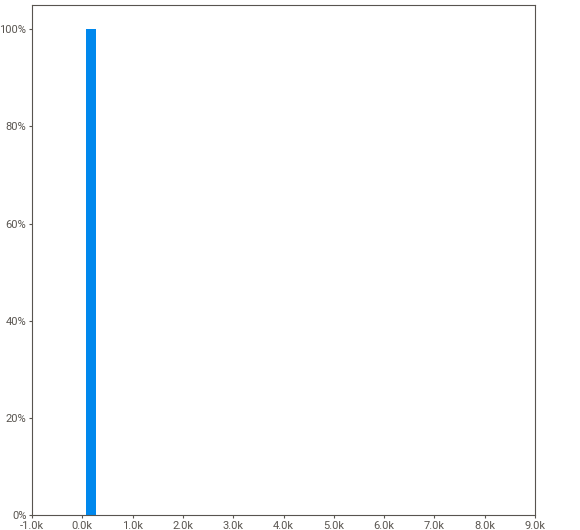
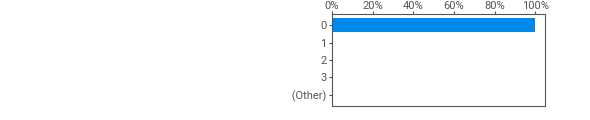
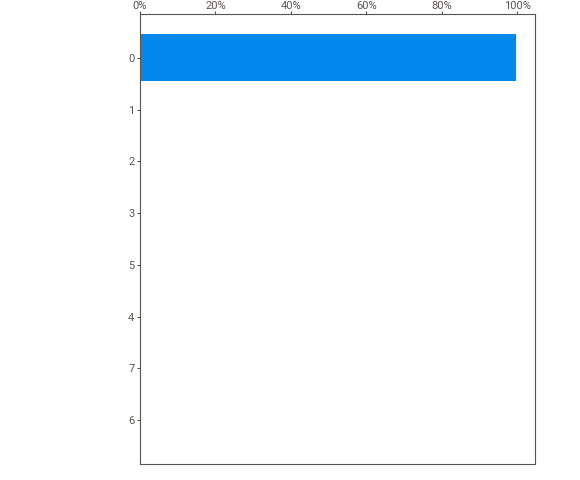
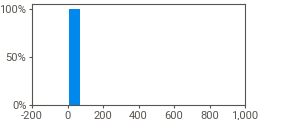
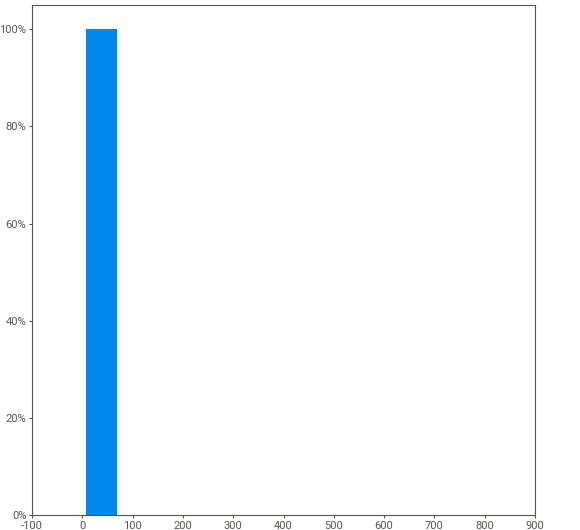
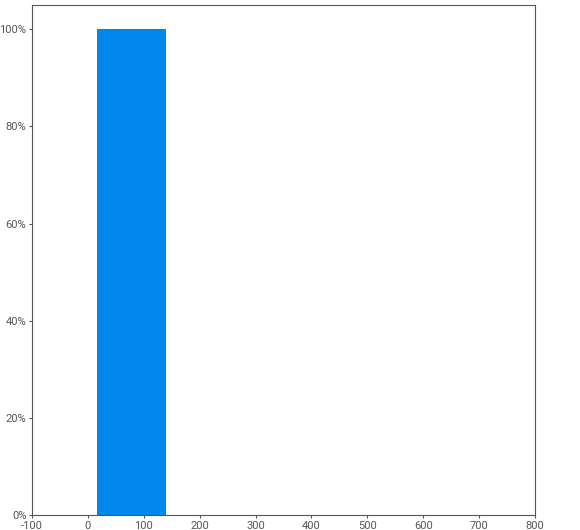
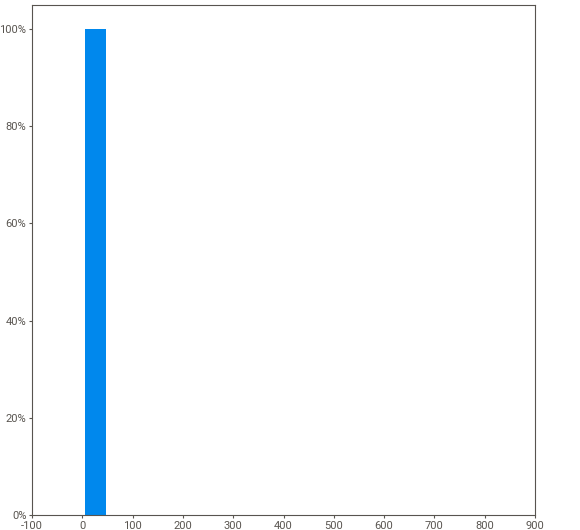
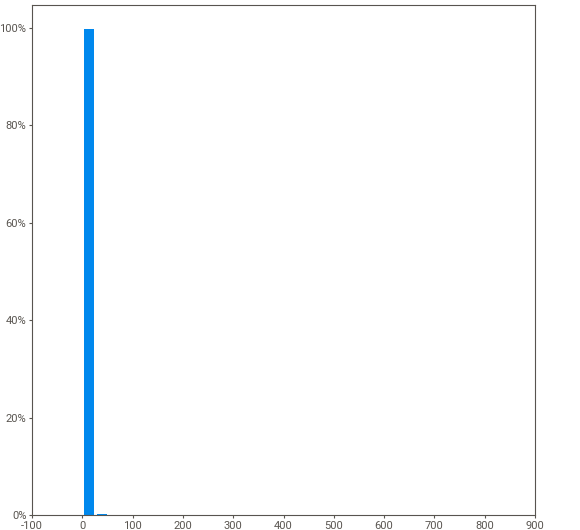
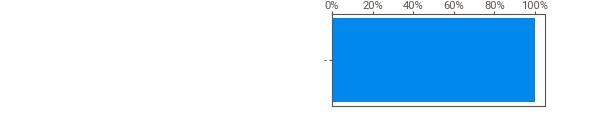
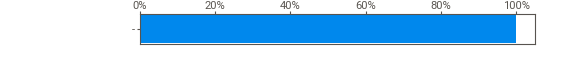
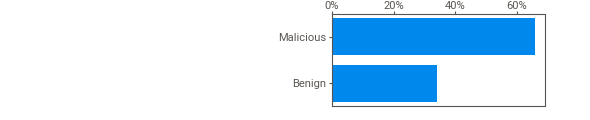
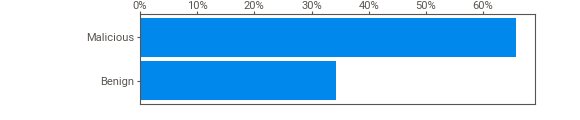
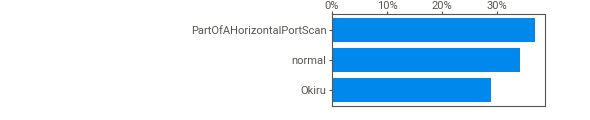
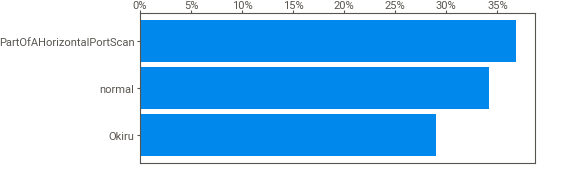
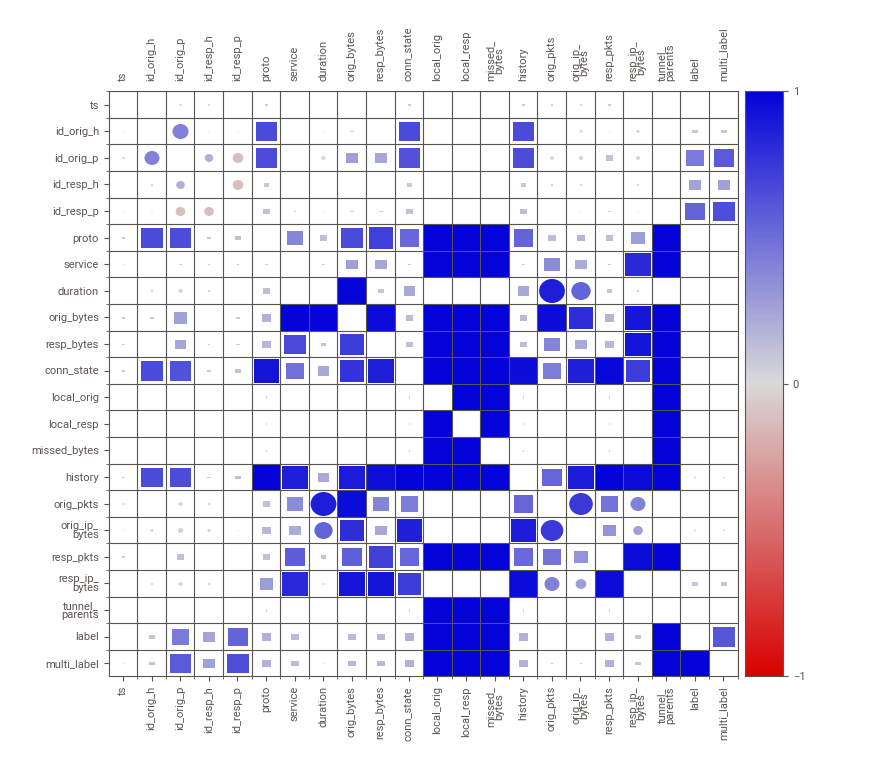
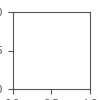

In [103]:
sw_rep.show_notebook()

In [104]:
def convert_ip2int(ip_add):
    """
    Convert the IP Addresses into integer value.
    """
    try:
        if '.' in str(ip_add):  # ipv4
            ip = ipaddress.IPv4Address(ip_add)
        elif ':' in str(ip_add):  # ipv6
            ip = ipaddress.IPv6Address(ip_add)
        else:
            print('Invalid IP version', ip_add)
            ip = 0  # 0 refers invalid ip address
    except Exception as e:
        print('Invalid IP address: ', e)
        ip = 0  # 0 refers invalid ip address
    return int(ip)

In [107]:
data['id_orig_h'] = data['id_orig_h'].str.replace('_', '.')
data['id_resp_h'] = data['id_resp_h'].str.replace('_', '.')
data['orig_bytes'] = data['orig_bytes'].astype(str).str.replace('-','0', regex=True)
data['resp_bytes'] = data['resp_bytes'].astype(str).str.replace('-','0')

data['id_orig_h'] = data.id_orig_h.apply(convert_ip2int)
data['id_resp_h'] = data.id_resp_h.apply(convert_ip2int)

In [ ]:
data.head(3)

In [ ]:
# removing the columns from dataset which are not contributing towards any type of relationship between variables and target or within variables as well
new_data = data.drop(columns=['ts', 'uid', 'local_orig', 'local_resp', 'missed_bytes' , 'tunnel_parents'])

In [ ]:
new_data.head(5)1

                                             |          | [  0%]   00:00 -> (? left)


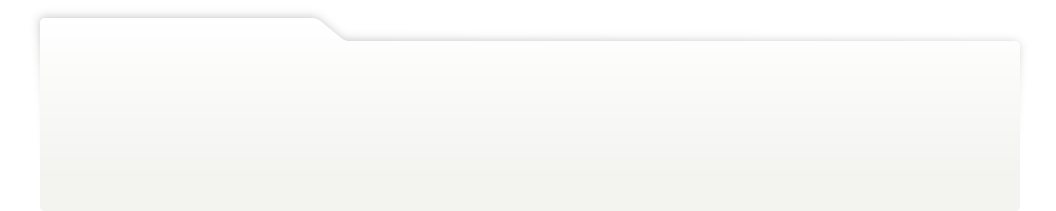
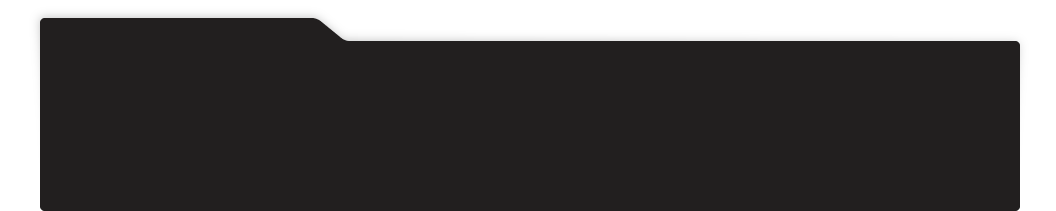
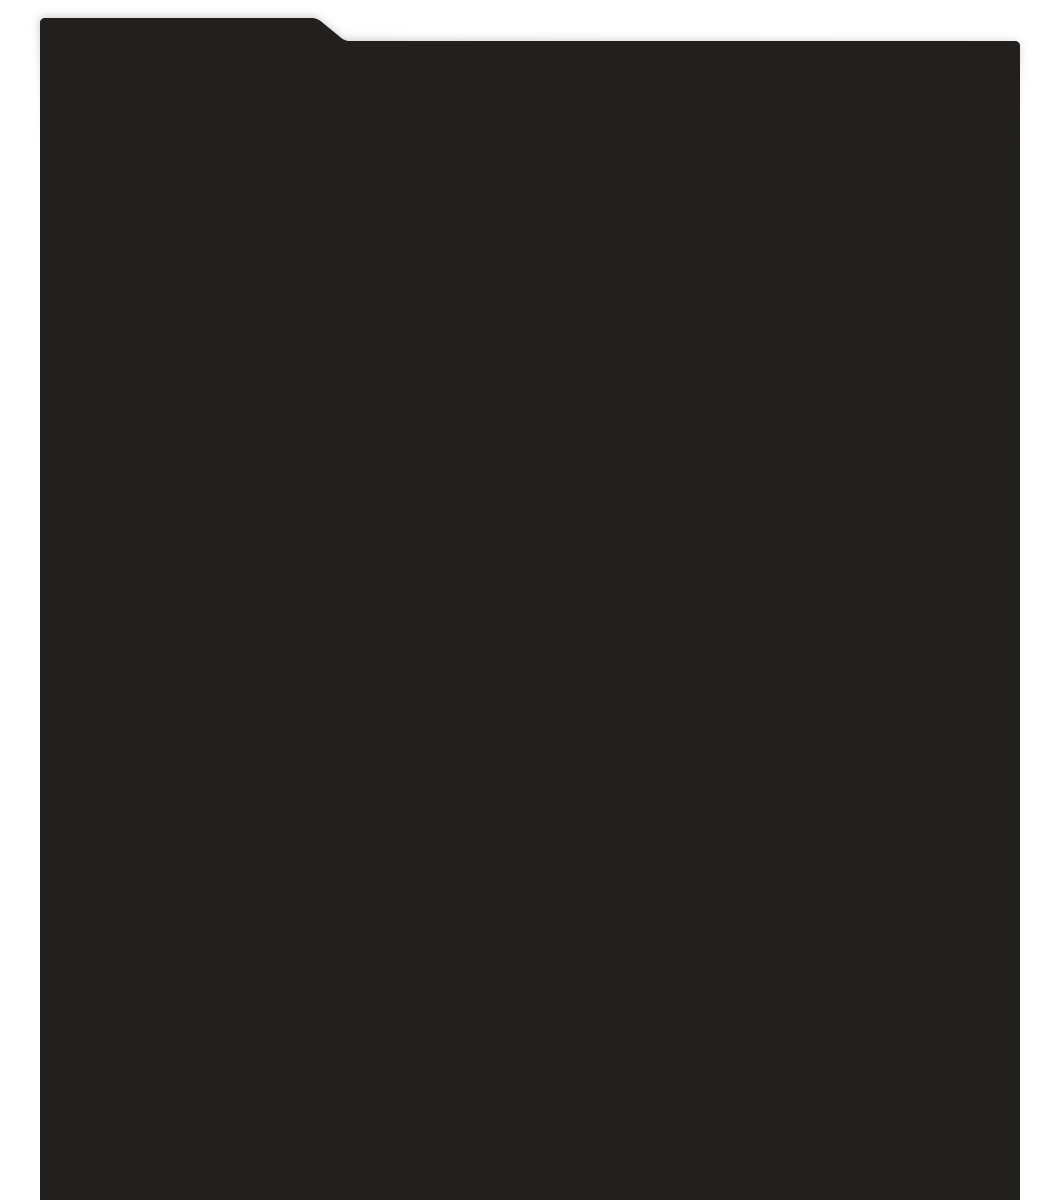
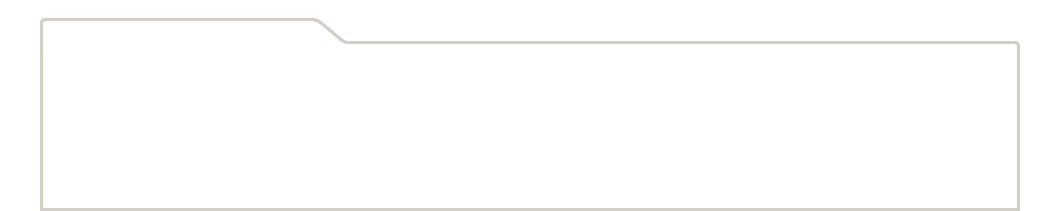
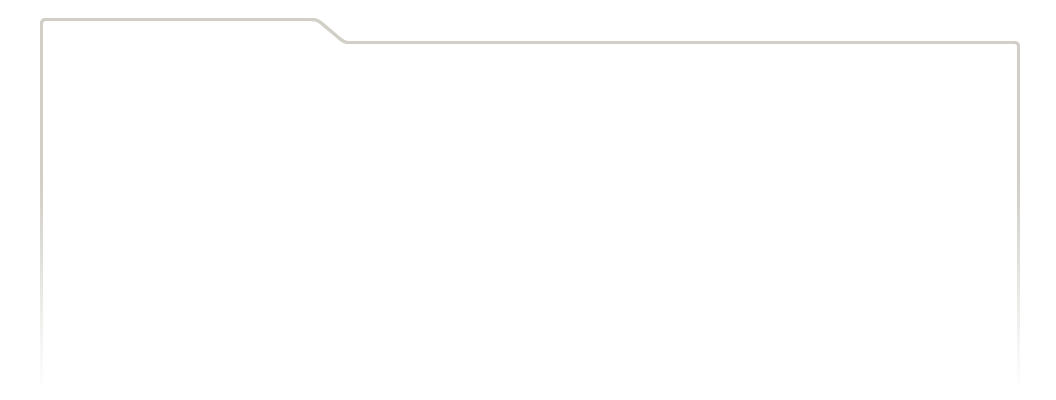
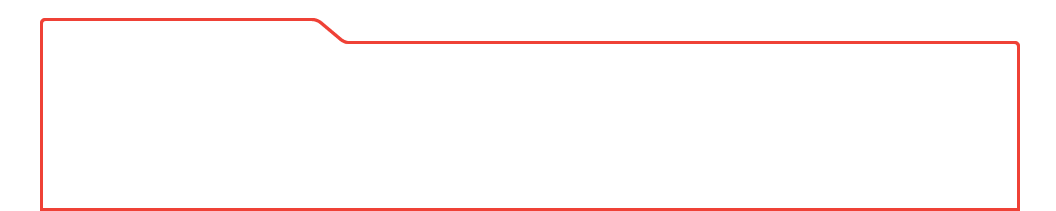
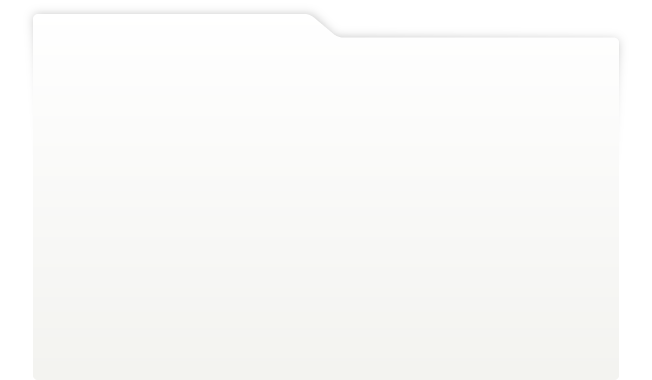
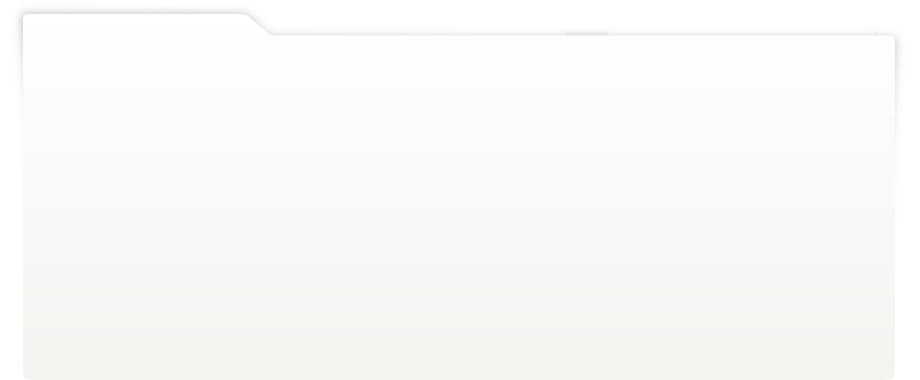
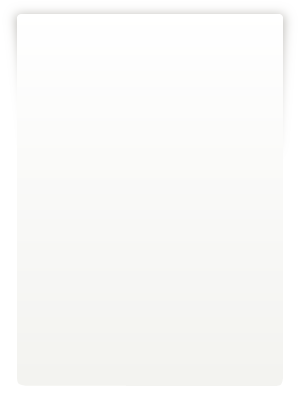
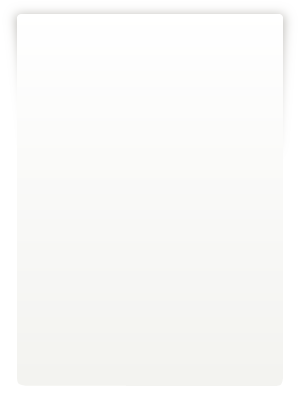
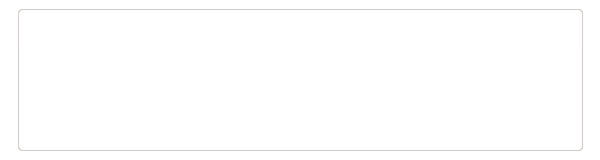
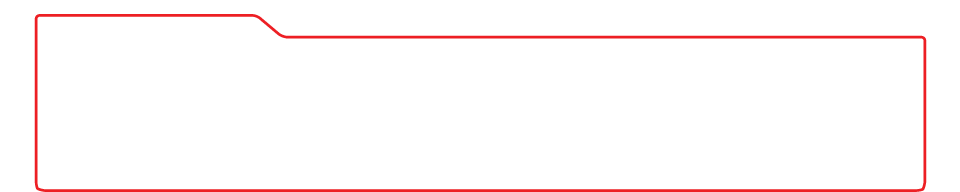
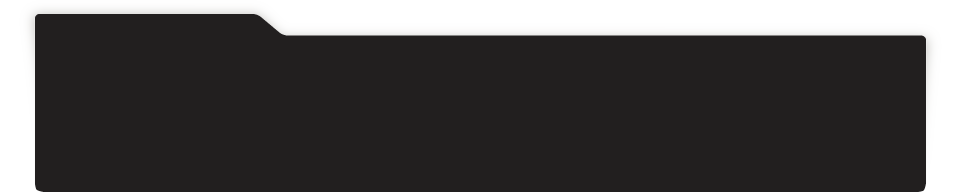
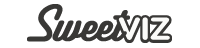
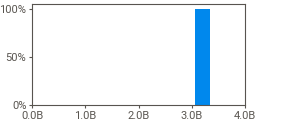
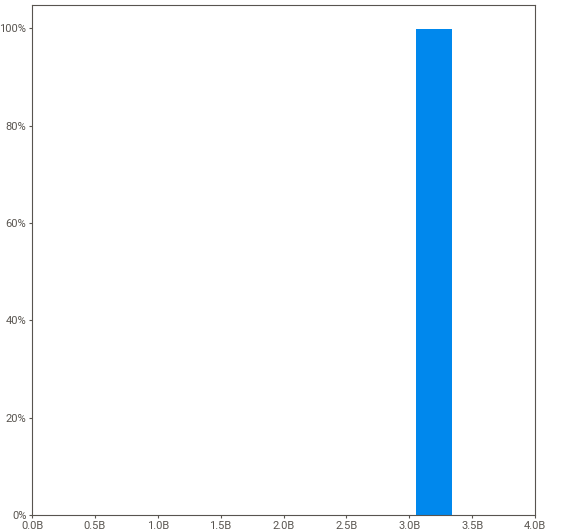
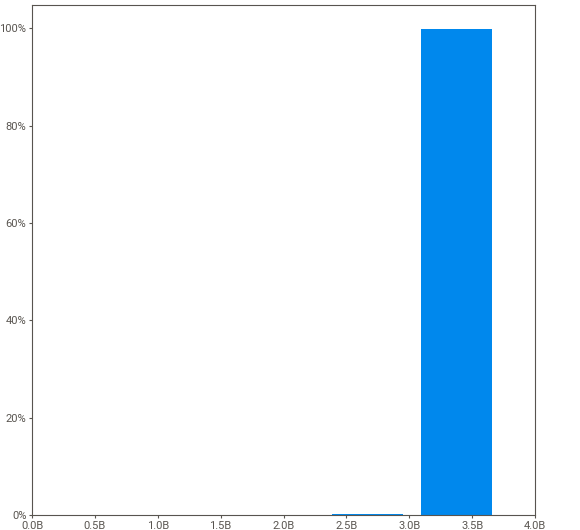
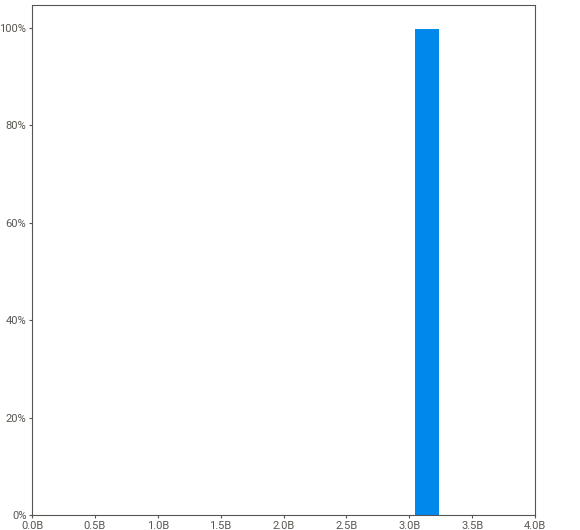
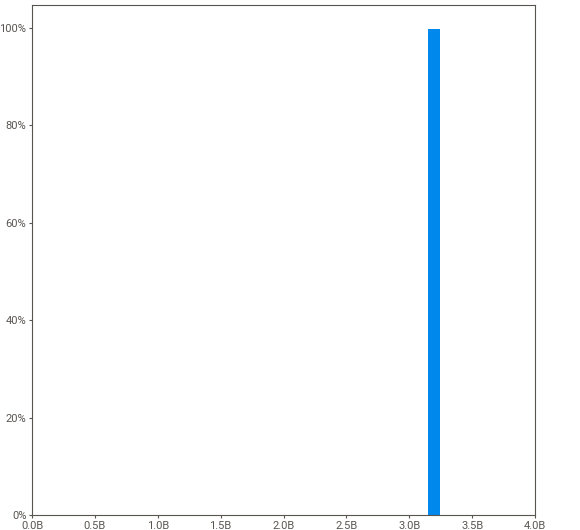
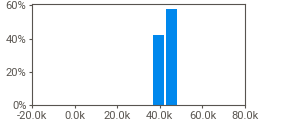
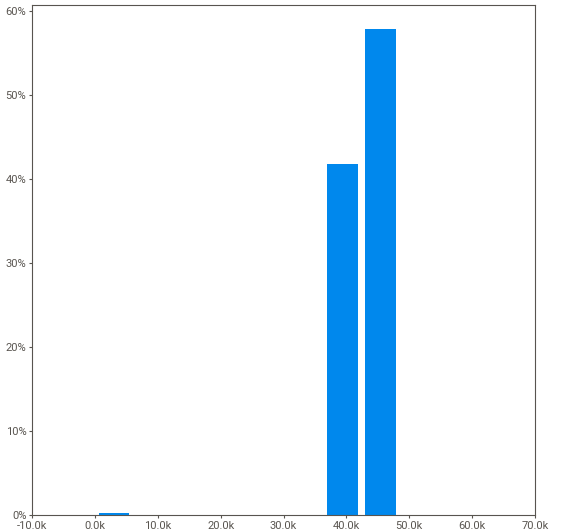
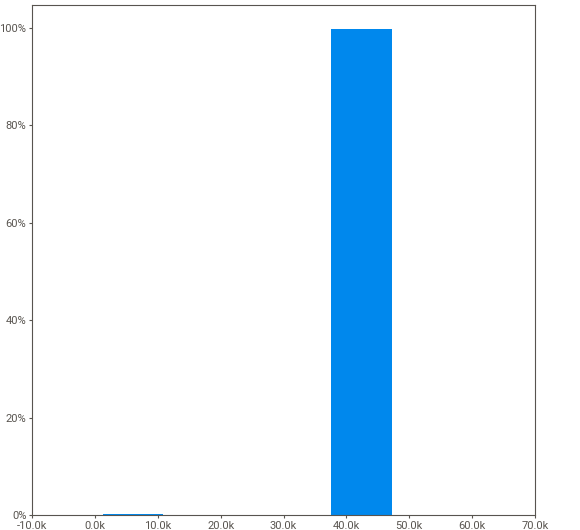
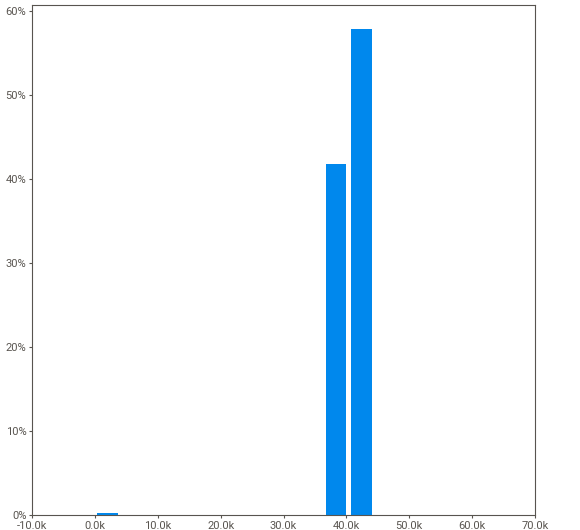
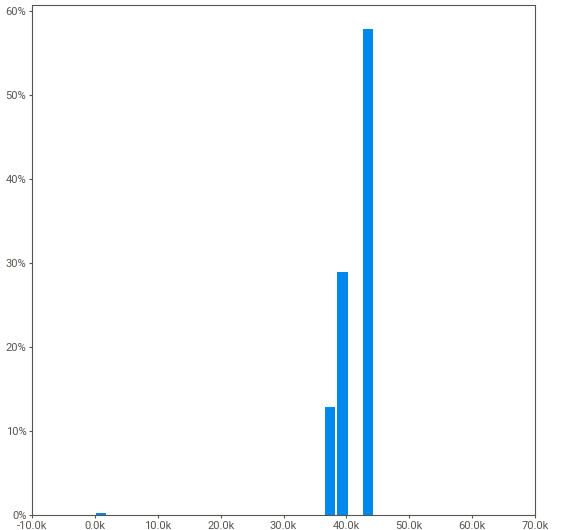
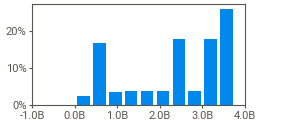
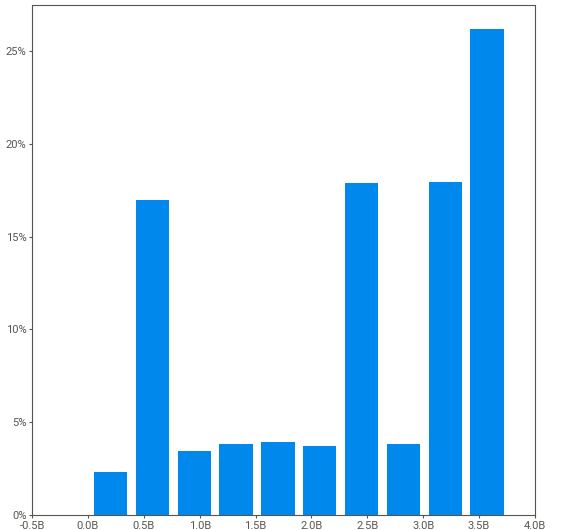
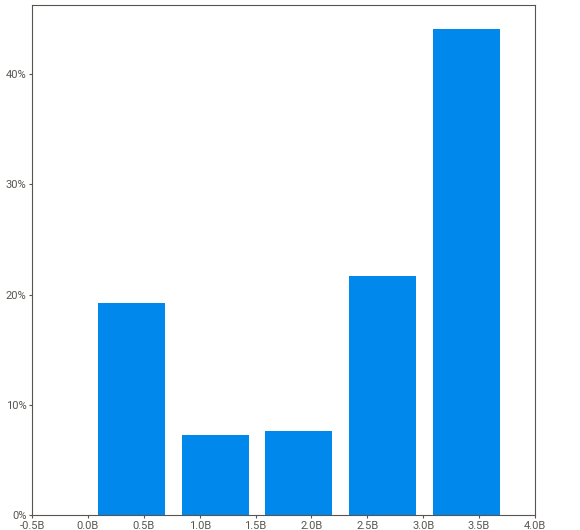
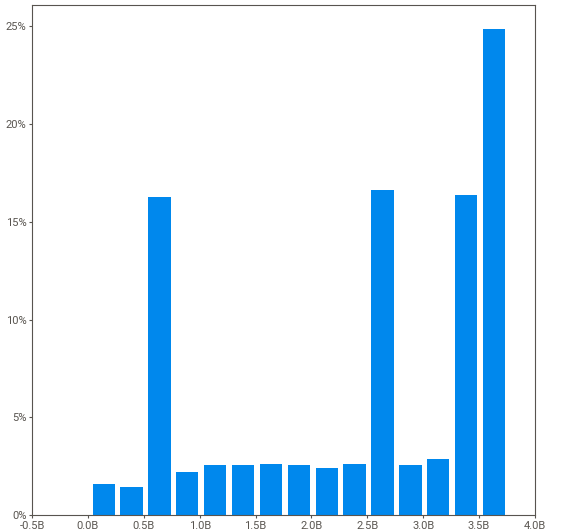
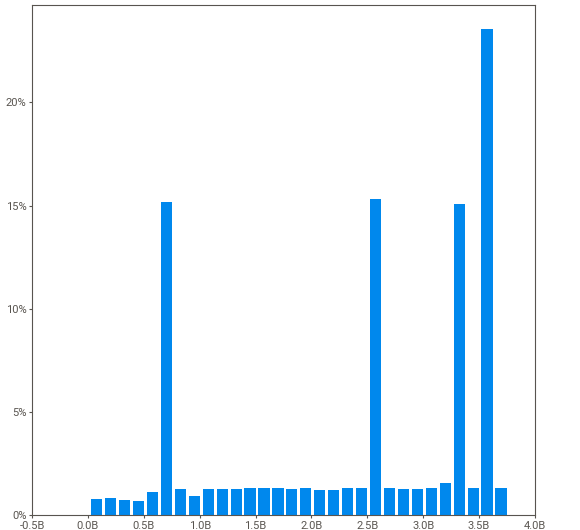
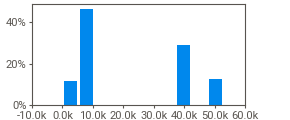
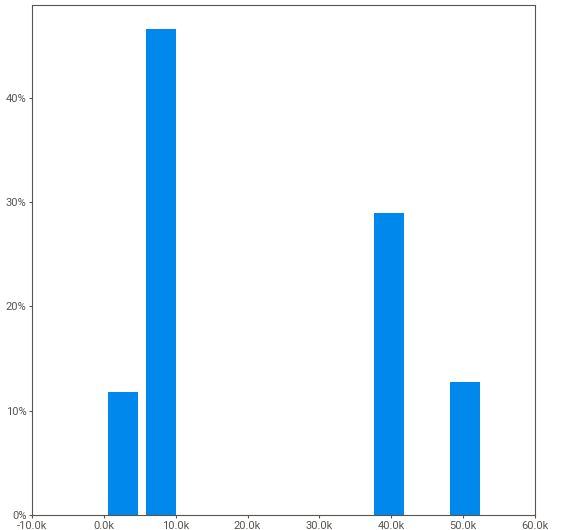
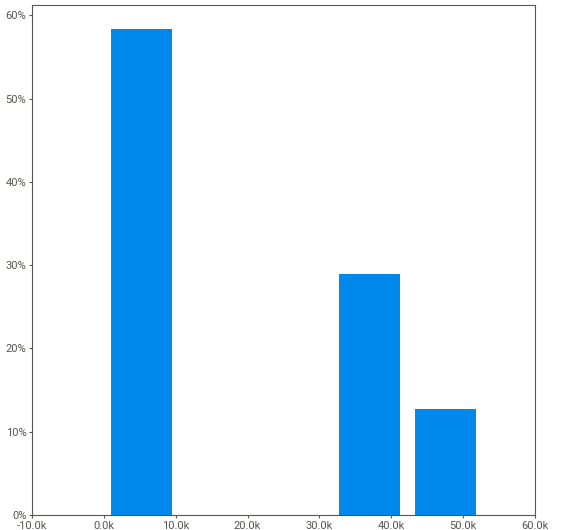
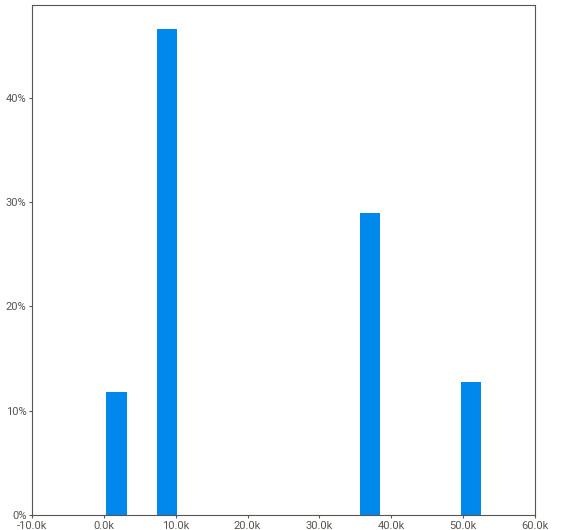
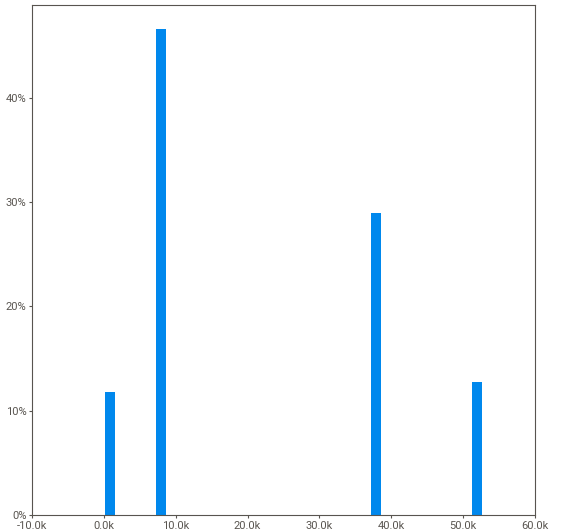
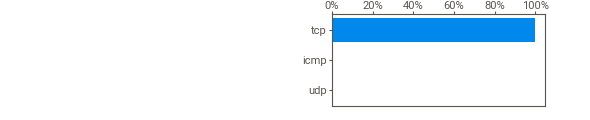
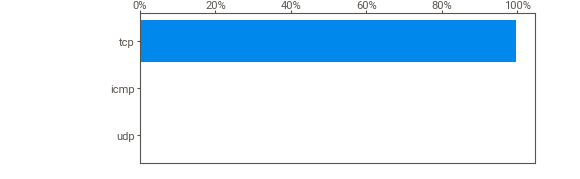
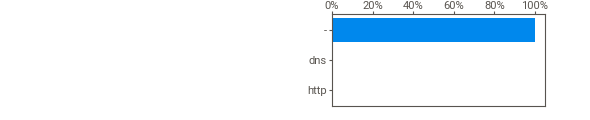
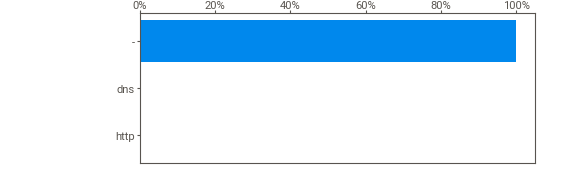
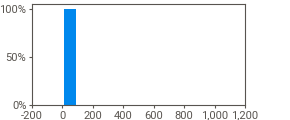
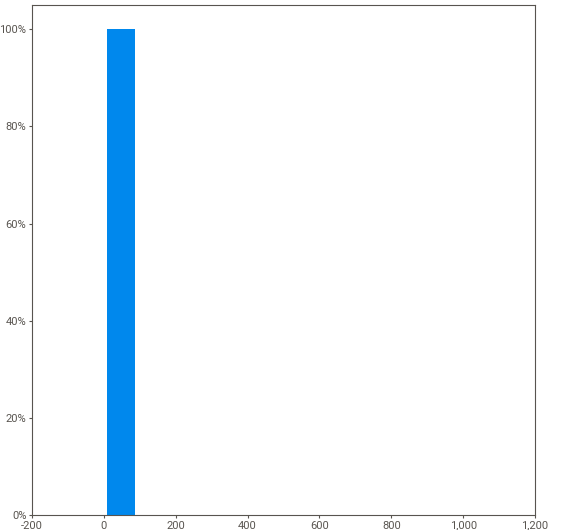
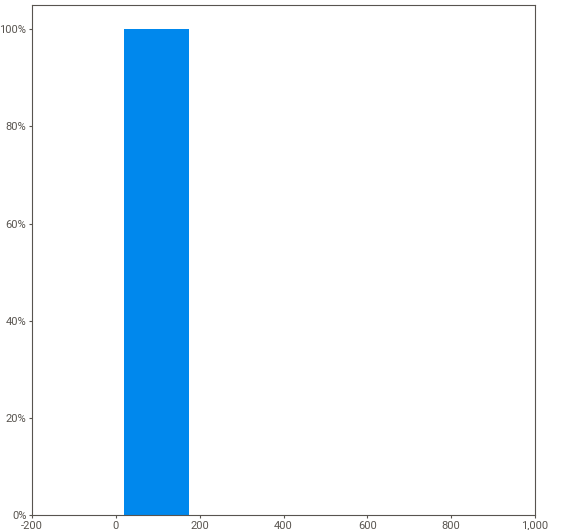
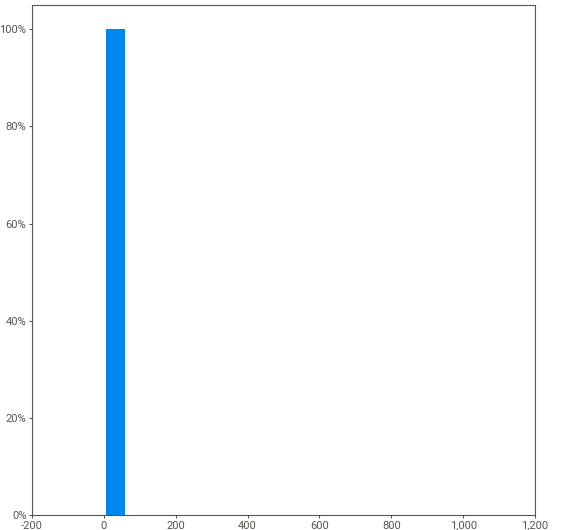
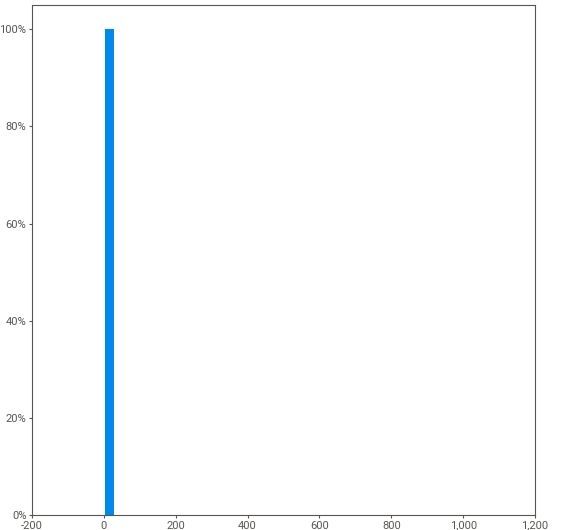
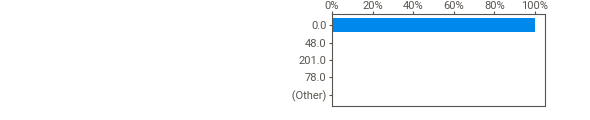
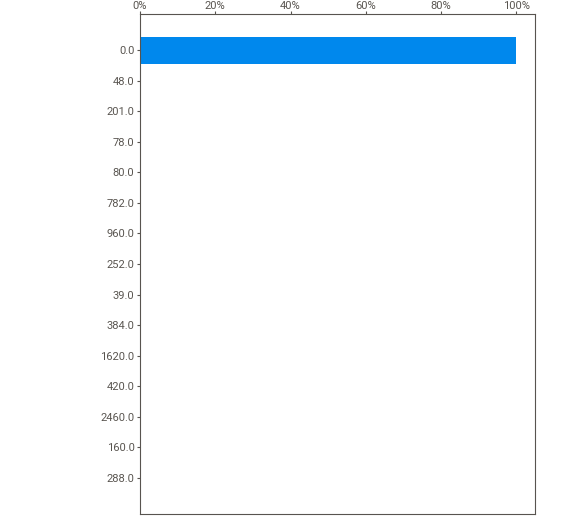
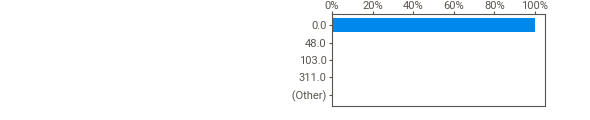
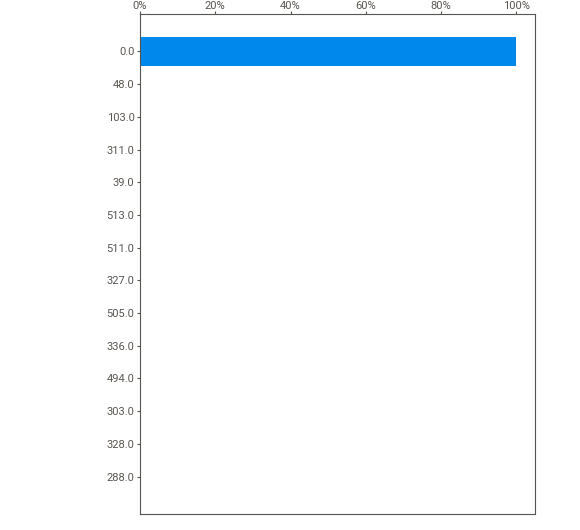
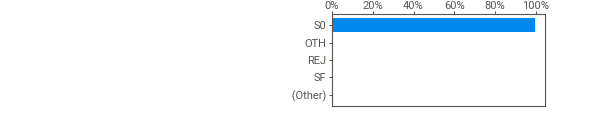
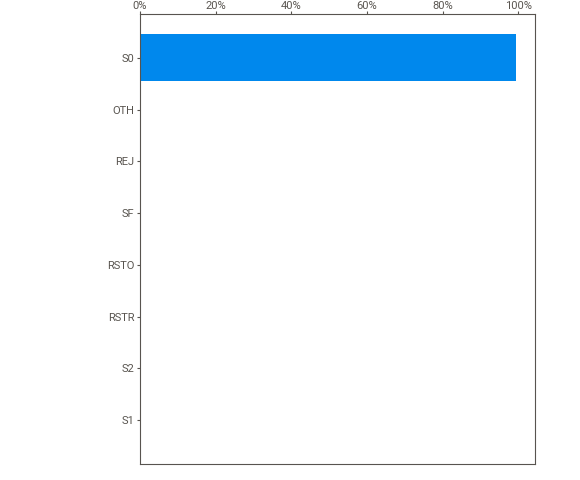
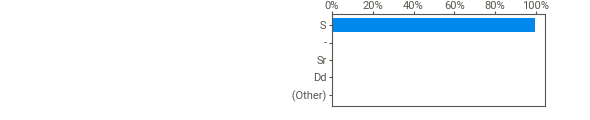
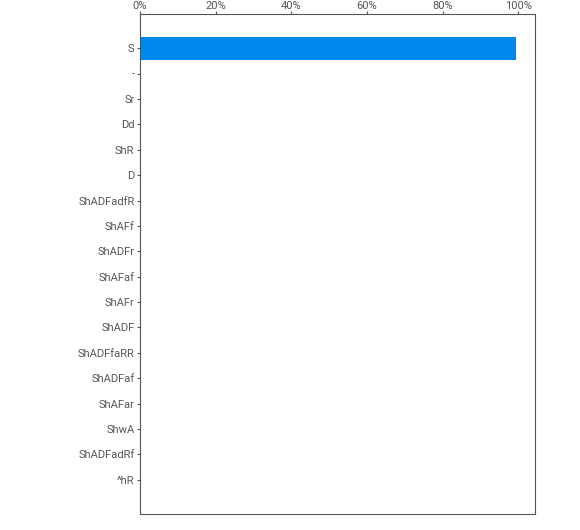
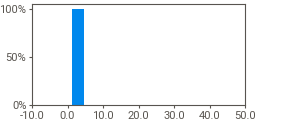
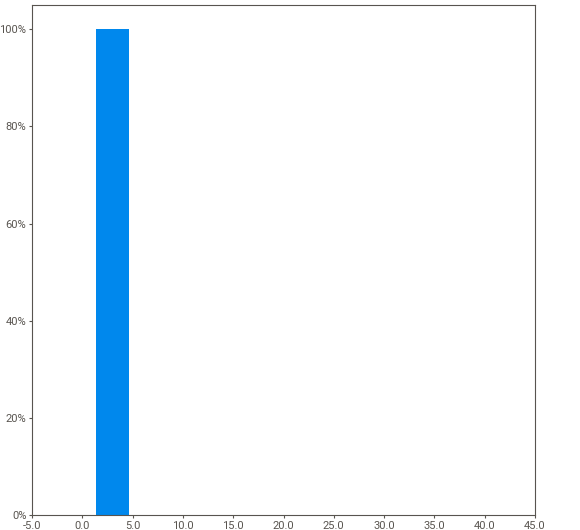
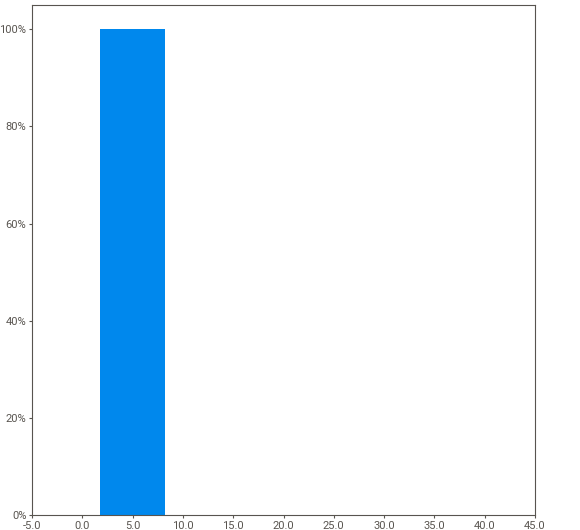
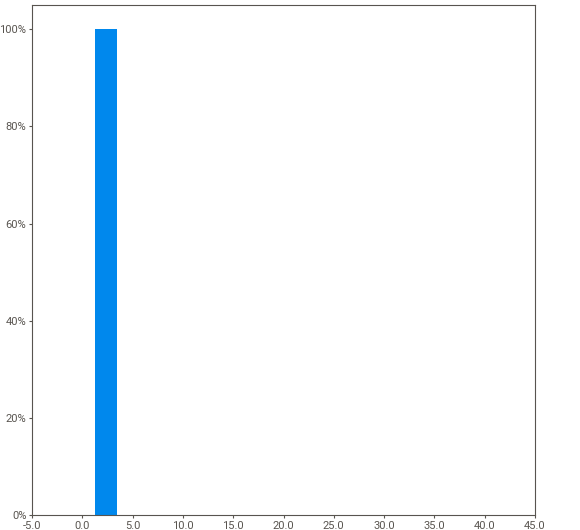
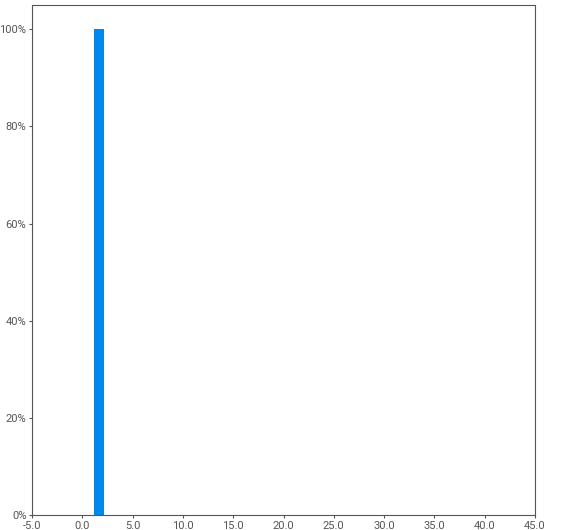
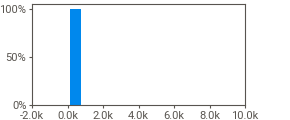
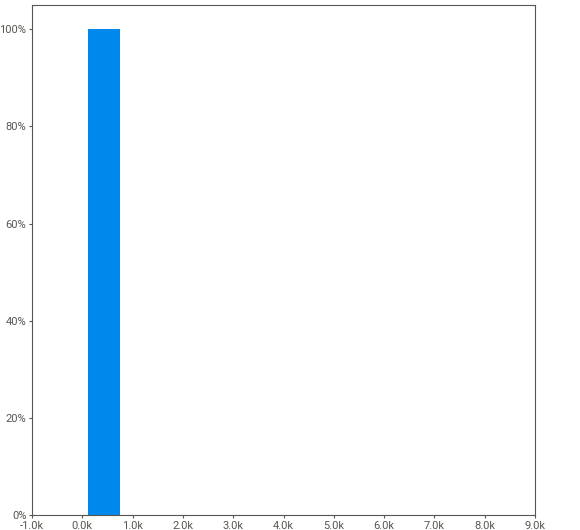
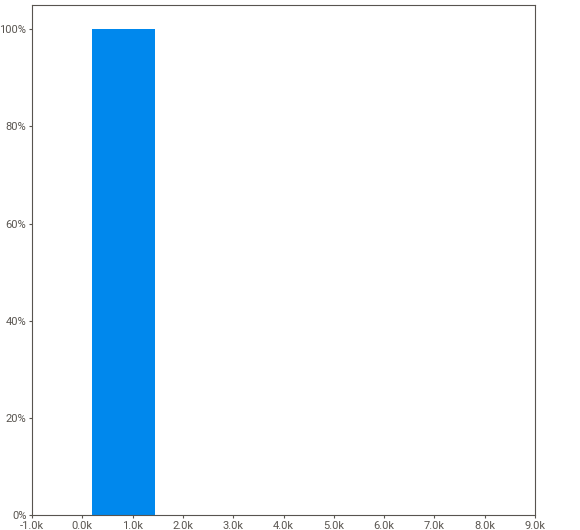
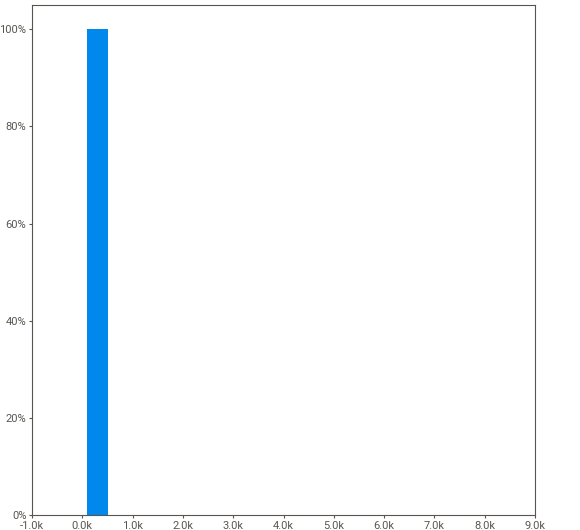
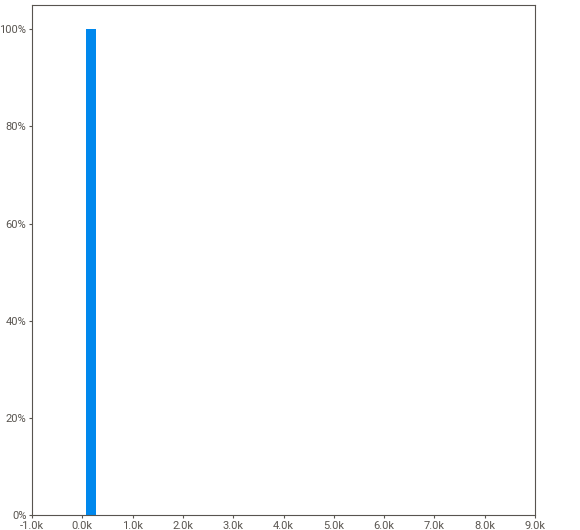
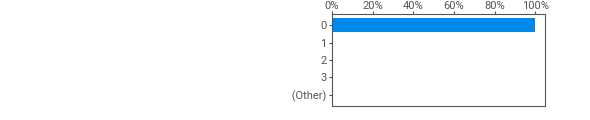
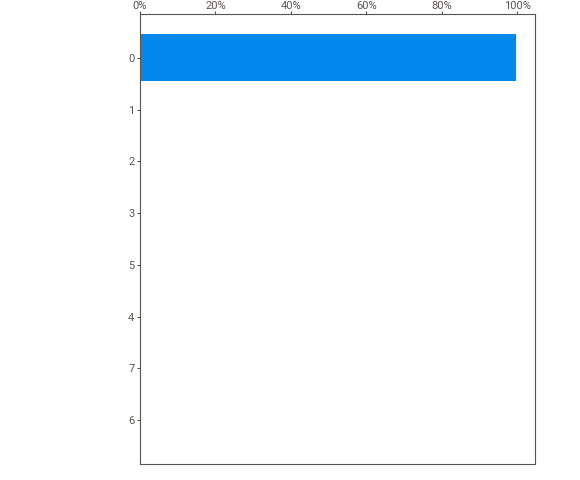
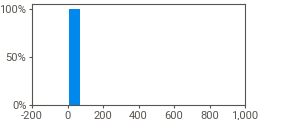
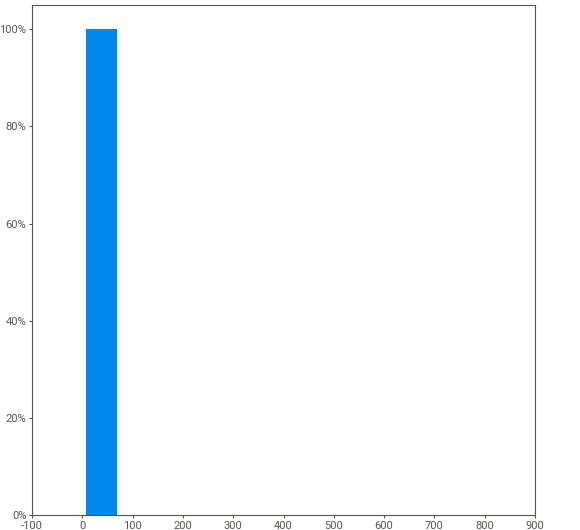
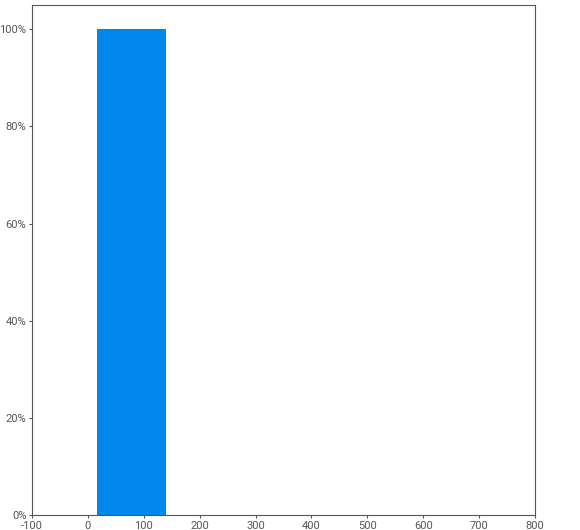
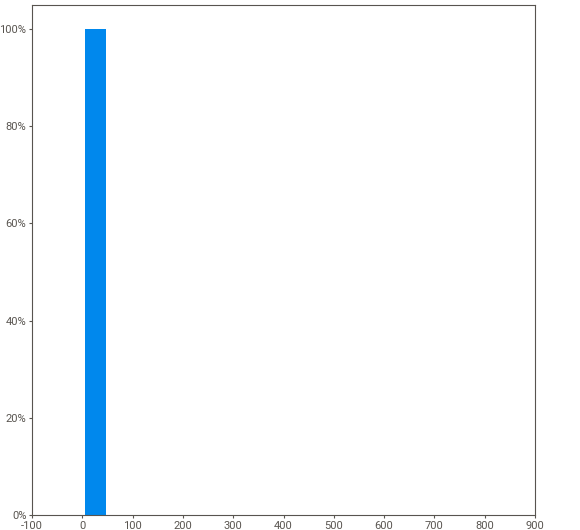
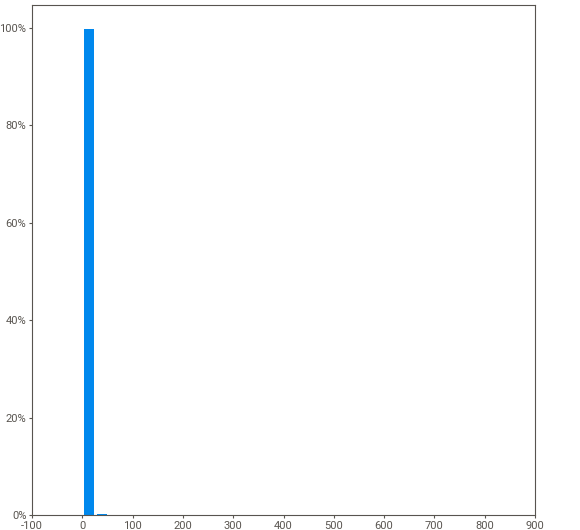
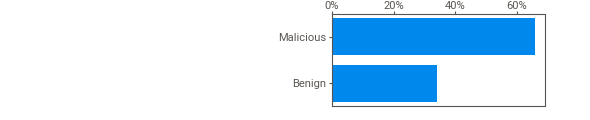
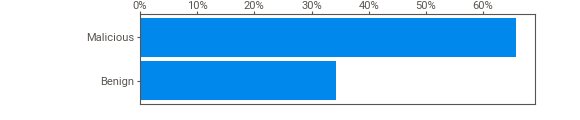
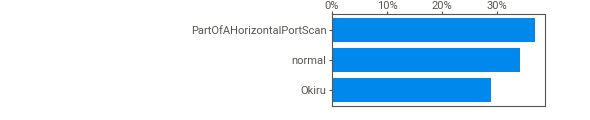
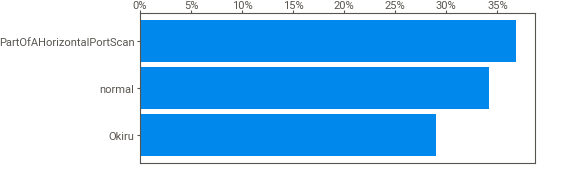
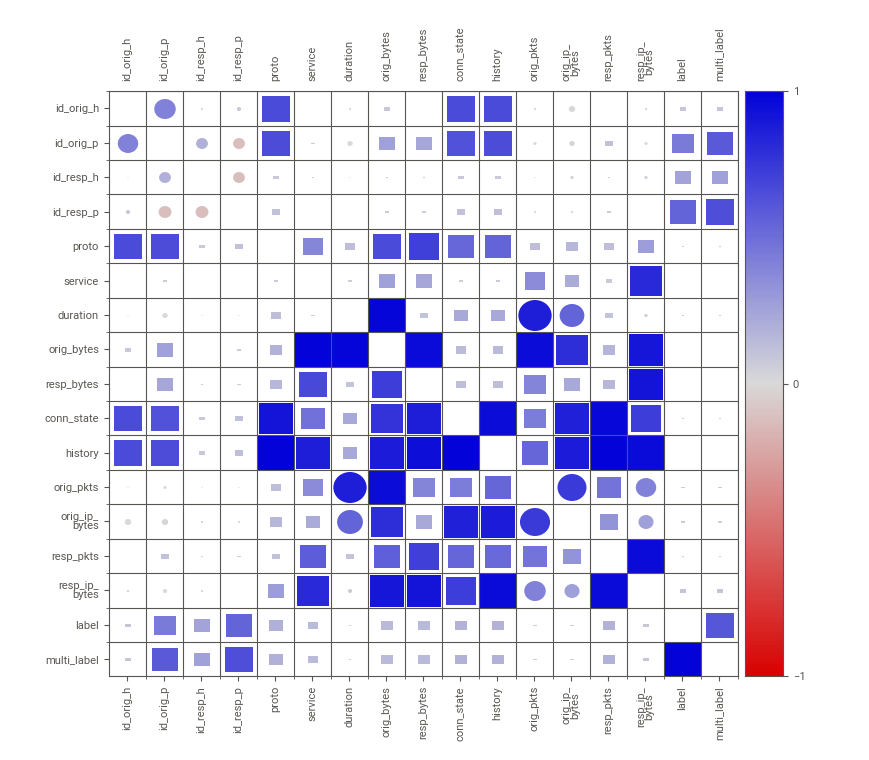
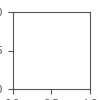

In [106]:
new_sw_rep = sw.analyze(new_data)
new_sw_rep.show_notebook()

<Axes: xlabel='label', ylabel='count'>

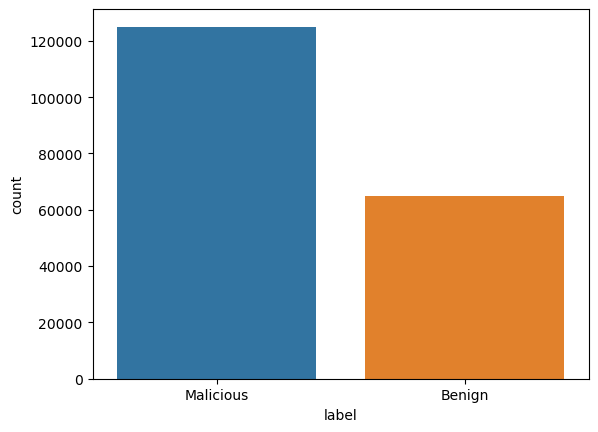

In [16]:
sns.countplot(x = data['label'])

<Axes: xlabel='multi_label', ylabel='count'>

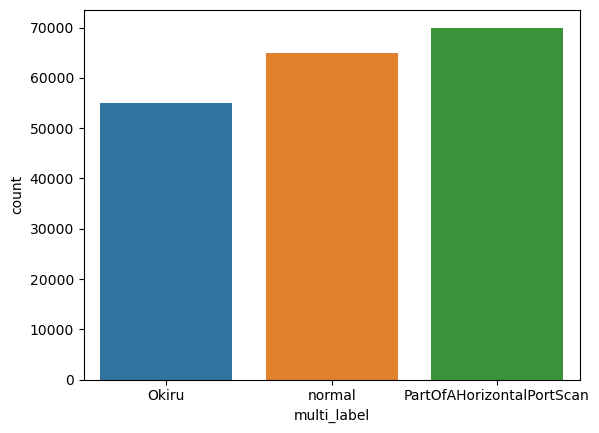

In [17]:
sns.countplot(x = data['multi_label'])

<Axes: >

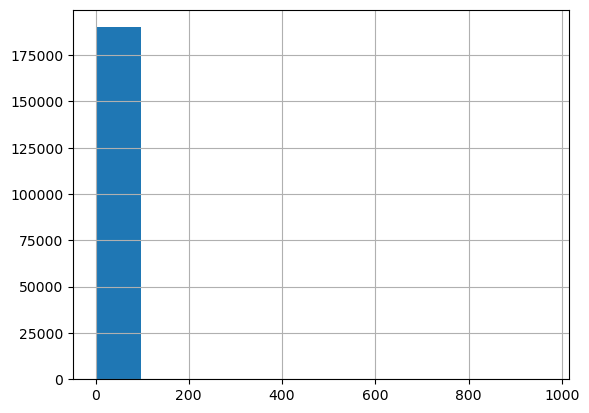

In [18]:
data['duration'].hist()

<Axes: xlabel='duration', ylabel='Count'>

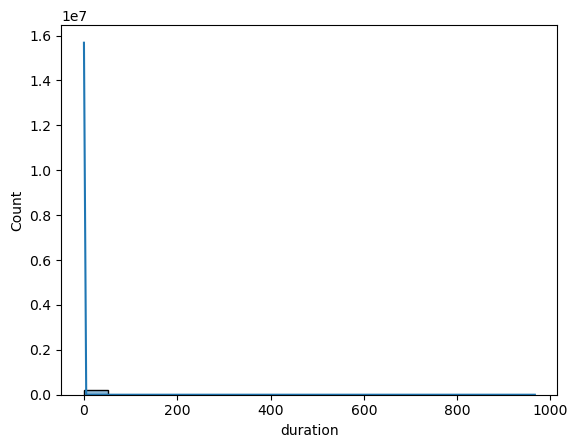

In [19]:
sns.histplot(x = data['duration'], kde=True)

<Axes: xlabel='id_resp_h', ylabel='Count'>

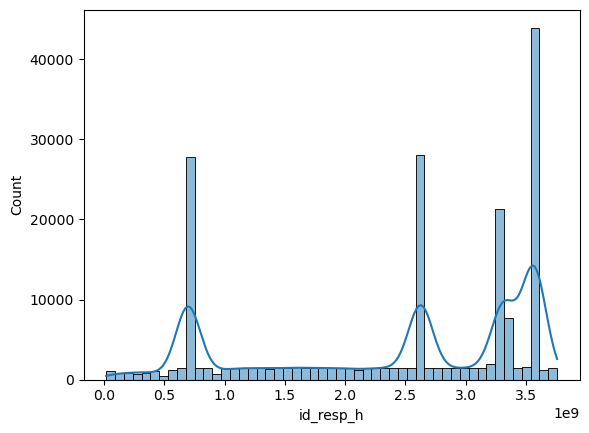

In [20]:
sns.histplot(data['id_resp_h'], kde=True)

In [22]:
# report = pf.ProfileReport(new_data)

# report.to_notebook_iframe()

In [23]:
new_data.nunique(dropna=False)

id_orig_h           442
id_orig_p            47
id_resp_h        189311
id_resp_p            12
proto                 3
service               3
duration            572
orig_bytes           15
resp_bytes           14
conn_state            8
history              18
orig_pkts            13
orig_ip_bytes        35
resp_pkts             8
resp_ip_bytes        22
label                 2
multi_label           3
dtype: int64

In [21]:
def normalize_data(df_exp):
    """
    Normalize the data using MinMaxScaler
    """
    # Normalize data
    df_hist = df_exp.astype(float)
    x = df_hist.values #returns a numpy array
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_scaled = pd.DataFrame(x_scaled)
    df_scaled.columns = df_hist.columns

    return df_scaled

In [22]:
X = new_data.drop(columns=['label','multi_label'])
y = new_data[['label','multi_label']]

In [23]:
label_enc = LabelEncoder()
label_enc.fit(y['label'])
y['label'] = label_enc.transform(y['label'])

In [24]:
multi_label_enc = LabelEncoder()
multi_label_enc.fit(y['multi_label'])
y['multi_label'] = multi_label_enc.transform(y['multi_label'])

In [25]:
y['multi_label'].value_counts()

1    70000
2    65000
0    55000
Name: multi_label, dtype: int64

In [26]:
ce = CatBoostEncoder()
X[['orig_bytes', 'resp_bytes']] = ce.fit_transform(X[['orig_bytes', 'resp_bytes']], y['label'])

In [27]:
X.head(4)

,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,3232235973,38370,3306917510,37215,tcp,-,0.0,0.657895,0.657895,S0,S,1,40,0,0
1,3232235973,38370,704028023,37215,tcp,-,0.0,0.828947,0.828947,S0,S,1,40,0,0
2,3232235973,38370,3319271955,37215,tcp,-,0.0,0.885965,0.885965,S0,S,1,40,0,0
3,3232235973,38370,3308200491,37215,tcp,-,0.0,0.914474,0.914474,S0,S,1,40,0,0


In [28]:
history_label_enc = LabelEncoder()
history_label_enc.fit(X['history'])
X['history'] = history_label_enc.transform(X['history'])

In [29]:
X['history'].value_counts()

3     188922
0        481
16       438
2         58
14        42
1         34
6          7
12         4
9          3
10         2
13         2
4          1
8          1
7          1
11         1
15         1
5          1
17         1
Name: history, dtype: int64

In [30]:
conn_state_label_enc = LabelEncoder()
conn_state_label_enc.fit(X['conn_state'])
X['conn_state'] = conn_state_label_enc.transform(X['conn_state'])

In [31]:
X['conn_state'].value_counts()

4    188956
0       481
1       438
7        74
2        43
3         6
6         1
5         1
Name: conn_state, dtype: int64

In [32]:
X = pd.get_dummies(data=X, columns=['proto', 'service'])

In [33]:
X = normalize_data(X)

In [34]:
X.head(5)

,id_orig_h,id_orig_p,id_resp_h,id_resp_p,duration,orig_bytes,resp_bytes,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,proto_udp,service_-,service_dns,service_http
0,0.859672,0.633464,0.879409,0.70391,0.0,0.653599,0.653599,0.571429,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.859672,0.633464,0.183693,0.70391,0.0,0.826803,0.826803,0.571429,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.859672,0.633464,0.882712,0.70391,0.0,0.884537,0.884537,0.571429,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.859672,0.633464,0.879752,0.70391,0.0,0.913404,0.913404,0.571429,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.859672,0.633464,0.881638,0.70391,0.0,0.930725,0.930725,0.571429,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Building a model on label instead of multi-label

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y['label'],test_size=0.25, random_state=42)

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_predict = lr.predict(X_train)
print(classification_report(y_train, lr_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lr_train_predict)}')

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     48738
           1       0.98      0.83      0.90     93762

    accuracy                           0.88    142500
   macro avg       0.86      0.90      0.87    142500
weighted avg       0.90      0.88      0.88    142500

AUC_ROC_SCORE_TRAIN = 0.9000517891443082


In [37]:
lr_test_predict = lr.predict(X_test)
print(classification_report(y_test, lr_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lr_test_predict)}')

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     16262
           1       0.98      0.82      0.90     31238

    accuracy                           0.88     47500
   macro avg       0.86      0.90      0.87     47500
weighted avg       0.90      0.88      0.88     47500

AUC_ROC_SCORE_TEST = 0.899358036796916


In [38]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_train_predict = lda.predict(X_train)
print(classification_report(y_train, lda_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lda_train_predict)}')

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     48738
           1       1.00      0.83      0.90     93762

    accuracy                           0.89    142500
   macro avg       0.87      0.91      0.88    142500
weighted avg       0.91      0.89      0.89    142500

AUC_ROC_SCORE_TRAIN = 0.9130088247222964


In [39]:
lda_test_predict = lda.predict(X_test)
print(classification_report(y_test, lda_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lda_test_predict)}')

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     16262
           1       1.00      0.82      0.90     31238

    accuracy                           0.88     47500
   macro avg       0.87      0.91      0.88     47500
weighted avg       0.91      0.88      0.89     47500

AUC_ROC_SCORE_TEST = 0.9121485914642384


In [43]:
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# knn_train_predict = knn.predict(X_train)
# print(classification_report(y_train, knn_train_predict))
# print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, knn_train_predict)}')

In [44]:
# knn_test_predict = knn.predict(X_test)
# print(classification_report(y_test, knn_test_predict))
# print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, knn_test_predict)}')

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_train_predict = dt.predict(X_train)
print(classification_report(y_train, dt_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, dt_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48738
           1       1.00      1.00      1.00     93762

    accuracy                           1.00    142500
   macro avg       1.00      1.00      1.00    142500
weighted avg       1.00      1.00      1.00    142500

AUC_ROC_SCORE_TRAIN = 1.0


In [41]:
dt_test_predict = dt.predict(X_test)
print(classification_report(y_test, dt_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, dt_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16262
           1       1.00      1.00      1.00     31238

    accuracy                           1.00     47500
   macro avg       1.00      1.00      1.00     47500
weighted avg       1.00      1.00      1.00     47500

AUC_ROC_SCORE_TEST = 1.0


In [42]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train_predict = xgb.predict(X_train)
print(classification_report(y_train, xgb_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, xgb_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48738
           1       1.00      1.00      1.00     93762

    accuracy                           1.00    142500
   macro avg       1.00      1.00      1.00    142500
weighted avg       1.00      1.00      1.00    142500

AUC_ROC_SCORE_TRAIN = 1.0


In [48]:
xgb_test_predict = xgb.predict(X_test)
print(classification_report(y_test, xgb_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, xgb_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16262
           1       1.00      1.00      1.00     31238

    accuracy                           1.00     47500
   macro avg       1.00      1.00      1.00     47500
weighted avg       1.00      1.00      1.00     47500

AUC_ROC_SCORE_TEST = 0.9999692534743574


In [45]:
res = {}
for cl in label_enc.classes_:
    res.update({cl:label_enc.transform([cl])[0]})

In [46]:
res

{'Benign': 0, 'Malicious': 1}

<Axes: >

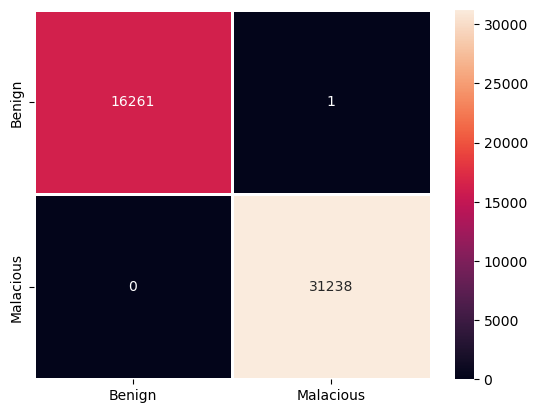

In [51]:
y_test_new = multi_label_enc.inverse_transform(y_test)
y_pred_new = multi_label_enc.inverse_transform(xgb_test_predict)

cf_matrix = confusion_matrix(y_test_new, y_pred_new)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=['Benign', 'Malacious'], yticklabels=['Benign', 'Malacious'])

In [43]:
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)
lightgbm_train_predict = xgb.predict(X_train)
print(classification_report(y_train, lightgbm_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lightgbm_train_predict)}')

[LightGBM] [Info] Number of positive: 93762, number of negative: 48738
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 142500, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.657979 -> initscore=0.654301
[LightGBM] [Info] Start training from score 0.654301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0 

In [44]:
lightgbm_test_predict = lightgbm.predict(X_test)
print(classification_report(y_test, lightgbm_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lightgbm_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16262
           1       1.00      1.00      1.00     31238

    accuracy                           1.00     47500
   macro avg       1.00      1.00      1.00     47500
weighted avg       1.00      1.00      1.00     47500

AUC_ROC_SCORE_TEST = 0.9999692534743574


## Now Building the model on multi_label with pairs of each

In [52]:
okiru_data = new_data.loc[(new_data['multi_label'] == 'Okiru')]

In [53]:
part_of_horizontal_data = new_data.loc[(new_data['multi_label'] == 'PartOfAHorizontalPortScan')]

In [54]:
normal_data = new_data.loc[(new_data['multi_label'] == 'normal')]

In [55]:
normal_data.shape

(65000, 17)

In [56]:
normal_okiru = pd.concat([normal_data, okiru_data])
normal_horizontal_data = pd.concat([normal_data, part_of_horizontal_data])

### Combination of normal and okiru

In [57]:
X_new = normal_okiru.drop(columns=['label','multi_label'])
y_new = normal_okiru['multi_label']

multi_label_enc = LabelEncoder()
multi_label_enc.fit(y_new)
y_new= multi_label_enc.transform(y_new)

ce = CatBoostEncoder()
X_new[['orig_bytes', 'resp_bytes']] = ce.fit_transform(X_new[['orig_bytes', 'resp_bytes']], y_new)
X_new = pd.get_dummies(data=X_new, columns=['proto', 'service', 'conn_state', 'history'])
X_new = normalize_data(X_new)

In [58]:
res = {}
for cl in multi_label_enc.classes_:
    res.update({cl:multi_label_enc.transform([cl])[0]})

In [59]:
res

{'Okiru': 0, 'normal': 1}

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new,test_size=0.25, random_state=42)

In [61]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_predict = lr.predict(X_train)
print(classification_report(y_train, lr_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lr_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41391
           1       1.00      1.00      1.00     48609

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

AUC_ROC_SCORE_TRAIN = 0.9999516803169771


In [62]:
lr_test_predict = lr.predict(X_test)
print(classification_report(y_test, lr_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lr_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13609
           1       1.00      1.00      1.00     16391

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

AUC_ROC_SCORE_TEST = 0.9998960146700481


In [63]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_train_predict = lda.predict(X_train)
print(classification_report(y_train, lda_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lda_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41391
           1       1.00      1.00      1.00     48609

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

AUC_ROC_SCORE_TRAIN = 0.999938283034006


In [64]:
lda_test_predict = lda.predict(X_test)
print(classification_report(y_test, lda_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lda_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13609
           1       1.00      1.00      1.00     16391

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

AUC_ROC_SCORE_TEST = 0.9998779818192911


In [65]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_train_predict = dt.predict(X_train)
print(classification_report(y_train, dt_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, dt_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41391
           1       1.00      1.00      1.00     48609

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

AUC_ROC_SCORE_TRAIN = 1.0


In [66]:
dt_test_predict = dt.predict(X_test)
print(classification_report(y_test, dt_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, dt_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13609
           1       1.00      1.00      1.00     16391

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

AUC_ROC_SCORE_TEST = 1.0


In [67]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train_predict = xgb.predict(X_train)
print(classification_report(y_train, xgb_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, xgb_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41391
           1       1.00      1.00      1.00     48609

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

AUC_ROC_SCORE_TRAIN = 1.0


In [68]:
xgb_test_predict = xgb.predict(X_test)
print(classification_report(y_test, xgb_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, xgb_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13609
           1       1.00      1.00      1.00     16391

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

AUC_ROC_SCORE_TEST = 1.0


<Axes: >

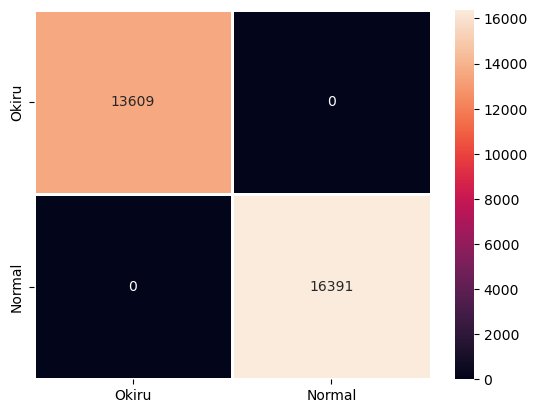

In [69]:
y_test_new = multi_label_enc.inverse_transform(y_test)
y_pred_new = multi_label_enc.inverse_transform(xgb_test_predict)

cf_matrix = confusion_matrix(y_test_new, y_pred_new)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=['Okiru', 'Normal'], yticklabels=['Okiru', 'Normal'])

In [70]:
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)
lightgbm_train_predict = xgb.predict(X_train)
print(classification_report(y_train, lightgbm_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lightgbm_train_predict)}')

[LightGBM] [Info] Number of positive: 48609, number of negative: 41391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1250
[LightGBM] [Info] Number of data points in the train set: 90000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540100 -> initscore=0.160745
[LightGBM] [Info] Start training from score 0.160745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [71]:
lightgbm_test_predict = lightgbm.predict(X_test)
print(classification_report(y_test, lightgbm_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lightgbm_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13609
           1       1.00      1.00      1.00     16391

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

AUC_ROC_SCORE_TEST = 1.0


### Combination of Part of Horizontal and Normal

In [72]:
X_new = normal_horizontal_data.drop(columns=['label','multi_label'])
y_new = normal_horizontal_data['multi_label']

multi_label_enc = LabelEncoder()
multi_label_enc.fit(y_new)
y_new= multi_label_enc.transform(y_new)

ce = CatBoostEncoder()
X_new[['orig_bytes', 'resp_bytes']] = ce.fit_transform(X_new[['orig_bytes', 'resp_bytes']], y_new)
X_new = pd.get_dummies(data=X_new, columns=['proto', 'service', 'conn_state', 'history'])
X_new = normalize_data(X_new)

In [73]:
res = {}
for cl in multi_label_enc.classes_:
    res.update({cl:multi_label_enc.transform([cl])[0]})

In [74]:
res

{'PartOfAHorizontalPortScan': 0, 'normal': 1}

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new,test_size=0.25, random_state=42)

In [76]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_predict = lr.predict(X_train)
print(classification_report(y_train, lr_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lr_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52609
           1       0.98      1.00      0.99     48641

    accuracy                           0.99    101250
   macro avg       0.99      0.99      0.99    101250
weighted avg       0.99      0.99      0.99    101250

AUC_ROC_SCORE_TRAIN = 0.9908574782405586


In [77]:
lr_test_predict = lr.predict(X_test)
print(classification_report(y_test, lr_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lr_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17391
           1       0.98      1.00      0.99     16359

    accuracy                           0.99     33750
   macro avg       0.99      0.99      0.99     33750
weighted avg       0.99      0.99      0.99     33750

AUC_ROC_SCORE_TEST = 0.9906812095600815


In [78]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_train_predict = lda.predict(X_train)
print(classification_report(y_train, lda_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lda_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     52609
           1       0.88      1.00      0.94     48641

    accuracy                           0.93    101250
   macro avg       0.94      0.94      0.93    101250
weighted avg       0.94      0.93      0.93    101250

AUC_ROC_SCORE_TRAIN = 0.9359964425375809


In [79]:
lda_test_predict = lda.predict(X_test)
print(classification_report(y_test, lda_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lda_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     17391
           1       0.88      1.00      0.94     16359

    accuracy                           0.93     33750
   macro avg       0.94      0.94      0.93     33750
weighted avg       0.94      0.93      0.93     33750

AUC_ROC_SCORE_TEST = 0.9358791231624841


In [80]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_train_predict = dt.predict(X_train)
print(classification_report(y_train, dt_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, dt_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52609
           1       1.00      1.00      1.00     48641

    accuracy                           1.00    101250
   macro avg       1.00      1.00      1.00    101250
weighted avg       1.00      1.00      1.00    101250

AUC_ROC_SCORE_TRAIN = 1.0


In [81]:
dt_test_predict = dt.predict(X_test)
print(classification_report(y_test, dt_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, dt_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17391
           1       1.00      1.00      1.00     16359

    accuracy                           1.00     33750
   macro avg       1.00      1.00      1.00     33750
weighted avg       1.00      1.00      1.00     33750

AUC_ROC_SCORE_TEST = 0.9999083073537502


In [82]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train_predict = xgb.predict(X_train)
print(classification_report(y_train, xgb_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, xgb_train_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52609
           1       1.00      1.00      1.00     48641

    accuracy                           1.00    101250
   macro avg       1.00      1.00      1.00    101250
weighted avg       1.00      1.00      1.00    101250

AUC_ROC_SCORE_TRAIN = 1.0


In [83]:
xgb_test_predict = xgb.predict(X_test)
print(classification_report(y_test, xgb_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, xgb_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17391
           1       1.00      1.00      1.00     16359

    accuracy                           1.00     33750
   macro avg       1.00      1.00      1.00     33750
weighted avg       1.00      1.00      1.00     33750

AUC_ROC_SCORE_TEST = 0.9999083073537502


<Axes: >

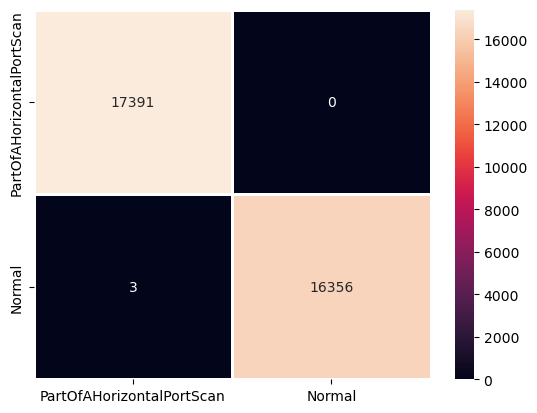

In [84]:
y_test_new = multi_label_enc.inverse_transform(y_test)
y_pred_new = multi_label_enc.inverse_transform(xgb_test_predict)

cf_matrix = confusion_matrix(y_test_new, y_pred_new)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=['PartOfAHorizontalPortScan', 'Normal'], yticklabels=['PartOfAHorizontalPortScan', 'Normal'])

In [85]:
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)
lightgbm_train_predict = xgb.predict(X_train)
print(classification_report(y_train, lightgbm_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lightgbm_train_predict)}')

[LightGBM] [Info] Number of positive: 48641, number of negative: 52609
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 101250, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480405 -> initscore=-0.078420
[LightGBM] [Info] Start training from score -0.078420
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52609
           1       1.00      1.00      1.00     48641

    accuracy                           1.00    101250
   macro avg       1.00      1.00      1.00    101250
weighted avg       1.00      1.00      1.00    101250

AUC_ROC_SCORE_TRAIN = 1.0


In [86]:
lightgbm_test_predict = lightgbm.predict(X_test)
print(classification_report(y_test, lightgbm_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lightgbm_test_predict)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17391
           1       1.00      1.00      1.00     16359

    accuracy                           1.00     33750
   macro avg       1.00      1.00      1.00     33750
weighted avg       1.00      1.00      1.00     33750

AUC_ROC_SCORE_TEST = 0.9998795568506165


## Using all the three detailed labels

In [87]:
new_data['multi_label'].value_counts()

PartOfAHorizontalPortScan    70000
normal                       65000
Okiru                        55000
Name: multi_label, dtype: int64

In [88]:
X = new_data.drop(columns=['label','multi_label'])
y = new_data['multi_label']

multi_label_enc = LabelEncoder()
multi_label_enc.fit(y)
y= multi_label_enc.transform(y)

ce = CatBoostEncoder()
X[['orig_bytes', 'resp_bytes']] = ce.fit_transform(X[['orig_bytes', 'resp_bytes']], y)
X = pd.get_dummies(data=X, columns=['proto', 'service', 'conn_state', 'history'])
X = normalize_data(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [90]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_predict = lr.predict(X_train)
lr_train_predict_prob = lr.predict_proba(X_train)
print(classification_report(y_train, lr_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lr_train_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41222
           1       0.92      1.00      0.96     52540
           2       1.00      0.90      0.95     48738

    accuracy                           0.97    142500
   macro avg       0.97      0.97      0.97    142500
weighted avg       0.97      0.97      0.97    142500

AUC_ROC_SCORE_TRAIN = 0.9945749958542693


In [91]:
lr_test_predict = lr.predict(X_test)
lr_test_predict_prob = lr.predict_proba(X_test)
print(classification_report(y_test, lr_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lr_test_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       0.92      1.00      0.96     17460
           2       1.00      0.91      0.95     16262

    accuracy                           0.97     47500
   macro avg       0.97      0.97      0.97     47500
weighted avg       0.97      0.97      0.97     47500

AUC_ROC_SCORE_TEST = 0.9945832359146985


<Axes: >

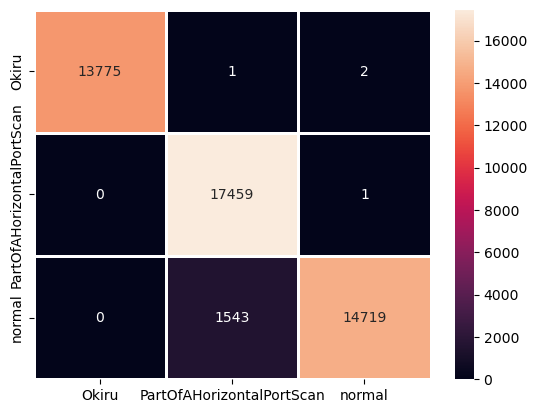

In [92]:
y_test_new = multi_label_enc.inverse_transform(y_test)
y_pred_new = multi_label_enc.inverse_transform(lr_test_predict)

cf_matrix = confusion_matrix(y_test_new, y_pred_new, labels=['Okiru', 'PartOfAHorizontalPortScan', 'normal'])
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=['Okiru', 'PartOfAHorizontalPortScan', 'normal'], yticklabels=['Okiru', 'PartOfAHorizontalPortScan', 'normal'])

In [93]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_train_predict = lda.predict(X_train)
lda_train_predict_prob = lda.predict_proba(X_train)
print(classification_report(y_train, lda_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lda_train_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41222
           1       0.85      0.69      0.76     52540
           2       0.73      0.87      0.79     48738

    accuracy                           0.84    142500
   macro avg       0.86      0.85      0.85    142500
weighted avg       0.85      0.84      0.84    142500

AUC_ROC_SCORE_TRAIN = 0.9803256688331206


In [94]:
lda_test_predict = lda.predict(X_test)
lda_test_predict_prob = lda.predict_proba(X_test)
print(classification_report(y_test, lda_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lda_test_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       0.85      0.69      0.76     17460
           2       0.72      0.87      0.79     16262

    accuracy                           0.84     47500
   macro avg       0.86      0.85      0.85     47500
weighted avg       0.85      0.84      0.84     47500

AUC_ROC_SCORE_TEST = 0.9808094245458734


In [95]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_train_predict = dt.predict(X_train)
dt_train_predict_prob = dt.predict_proba(X_train)
print(classification_report(y_train, dt_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, dt_train_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41222
           1       1.00      1.00      1.00     52540
           2       1.00      1.00      1.00     48738

    accuracy                           1.00    142500
   macro avg       1.00      1.00      1.00    142500
weighted avg       1.00      1.00      1.00    142500

AUC_ROC_SCORE_TRAIN = 1.0


In [96]:
dt_test_predict = dt.predict(X_test)
dt_test_predict_prob = dt.predict_proba(X_test)
print(classification_report(y_test, dt_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, dt_test_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       1.00      1.00      1.00     17460
           2       1.00      1.00      1.00     16262

    accuracy                           1.00     47500
   macro avg       1.00      1.00      1.00     47500
weighted avg       1.00      1.00      1.00     47500

AUC_ROC_SCORE_TEST = 0.999982355262901


In [97]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train_predict = xgb.predict(X_train)
xgb_train_predict_prob = xgb.predict_proba(X_train)
print(classification_report(y_train, xgb_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, xgb_train_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41222
           1       1.00      1.00      1.00     52540
           2       1.00      1.00      1.00     48738

    accuracy                           1.00    142500
   macro avg       1.00      1.00      1.00    142500
weighted avg       1.00      1.00      1.00    142500

AUC_ROC_SCORE_TRAIN = 1.0


In [98]:
xgb_test_predict = xgb.predict(X_test)
xgb_test_predict_prob = xgb.predict_proba(X_test)
print(classification_report(y_test, xgb_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, xgb_test_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       1.00      1.00      1.00     17460
           2       1.00      1.00      1.00     16262

    accuracy                           1.00     47500
   macro avg       1.00      1.00      1.00     47500
weighted avg       1.00      1.00      1.00     47500

AUC_ROC_SCORE_TEST = 0.999999725493775


<Axes: >

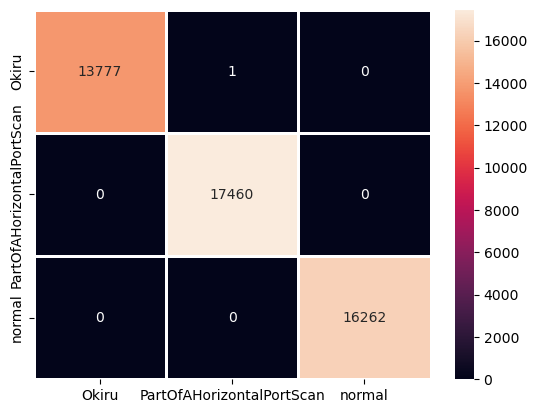

In [99]:
y_test_new = multi_label_enc.inverse_transform(y_test)
y_pred_new = multi_label_enc.inverse_transform(xgb_test_predict)

cf_matrix = confusion_matrix(y_test_new, y_pred_new, labels=['Okiru', 'PartOfAHorizontalPortScan', 'normal'])
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=['Okiru', 'PartOfAHorizontalPortScan', 'normal'], yticklabels=['Okiru', 'PartOfAHorizontalPortScan', 'normal'])

In [100]:
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)
lightgbm_train_predict = xgb.predict(X_train)
lightgbm_train_predict_prob = xgb.predict_proba(X_train)
print(classification_report(y_train, lightgbm_train_predict))
print(f'AUC_ROC_SCORE_TRAIN = {roc_auc_score(y_train, lightgbm_train_predict_prob, multi_class="ovr")}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1248
[LightGBM] [Info] Number of data points in the train set: 142500, number of used features: 25
[LightGBM] [Info] Start training from score -1.240370
[LightGBM] [Info] Start training from score -0.997767
[LightGBM] [Info] Start training from score -1.072883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [101]:
lightgbm_test_predict = lightgbm.predict(X_test)
lightgbm_test_predict_prob = lightgbm.predict_proba(X_test)
print(classification_report(y_test, lightgbm_test_predict))
print(f'AUC_ROC_SCORE_TEST = {roc_auc_score(y_test, lightgbm_test_predict_prob, multi_class="ovr")}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       1.00      1.00      1.00     17460
           2       1.00      1.00      1.00     16262

    accuracy                           1.00     47500
   macro avg       1.00      1.00      1.00     47500
weighted avg       1.00      1.00      1.00     47500

AUC_ROC_SCORE_TEST = 0.9999709873166469
